In [1]:
# # NOT-USED LIBRARIES
# # from seaborn import distplot
# # from seaborn import heatmap



# # OTHERS
# # import os
# # import calendar
# # import warnings
# # from math import sqrt
# # from datetime import datetime



# # NUMPY LIBRARIES
# # import numpy as np
# # from numpy import concatenate



# # PANDAS LIBRARIES
# # from pandas import DataFrame
# # from pandas import concat
# # from pandas import to_datetime



# # MATPLOTLIB LIBRARIES
# # from matplotlib import pyplot



# # CHARTSTUDIO LIBRARIES
# # from chart_studio.plotly import plotly



# # PLOTLY LIBRARIES
# # from plotly import graph_objs
# # from plotly.offline import init_notebook_mode
# # from plotly.offline import iplot



# # SKLEARN LIBRARIES
# # from sklearn.preprocessing import MinMaxScaler
# # from sklearn.preprocessing import StandardScaler
# # from sklearn.preprocessing import LabelEncoder
# # from sklearn.model_selection import train_test_split
# # from sklearn.metrics import r2_score
# # from sklearn.metrics import mean_absolute_error
# # from sklearn.metrics import mean_squared_error
# # from sklearn.metrics import mean_absolute_percentage_error



# # KERAS LIBRARIES
# # from keras.models import Sequential
# # from keras.layers import LSTM
# # from keras.layers import Dense
# # from keras.optimizers import RMSprop
# # from keras.optimizers import SGD
# # from keras.losses import MeanAbsoluteError
# # from keras.losses import MeanSquaredError
# # from keras.losses import MeanAbsolutePercentageError
# # from keras.losses import losses_utils



# # TENSORFLOW LIBRARIES
# # import tensorflow as tf

# Import Libraries

In [2]:
# OTHERS
import os
import time
import calendar
import warnings
from math import sqrt
from datetime import datetime



# PANDAS LIBRARIES
from pandas import read_csv
from pandas import DataFrame
from pandas import to_datetime
from pandas import DatetimeIndex



# NUMPY LIBRARIES
import numpy as np


# PLOTLY LIBRARIES
from plotly import graph_objs
from plotly.offline import init_notebook_mode
from plotly.offline import iplot



# MATPLOTLIB LIBRARIES
from matplotlib import pyplot



# XGBOOST LIBRARIES
import xgboost as xgb



# SKLEARN LIBRARIES
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



# KERAS LIBRARIES
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.optimizers import RMSprop

# # TENSORFLOW LIBRARIES
import tensorflow as tf

/home/xsif/anaconda3/envs/env005_energypredappliances/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4

/home/xsif/anaconda3/envs/env005_energypredappliances/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [3]:
warnings.filterwarnings(action = "ignore", category = UserWarning)

# Initialize dataset-directory and file-names

## &nbsp;&nbsp;- set dataset directory name

In [4]:
dataset_directory = "datasets/01 aep/"

## &nbsp;&nbsp;- set dataset train, train features, train targets, and test data filenames

In [5]:
dataset_original_file       = "{:}00 original.csv".format(dataset_directory)

dataset_train_file          = "{:}01 a train ts-1.csv".format(dataset_directory)
dataset_train_features_file = "{:}01 b train features ts-1.csv".format(dataset_directory)
dataset_train_targets_file  = "{:}01 c train targets ts-1.csv".format(dataset_directory)
dataset_test_file           = "{:}01 d test ts-1.csv".format(dataset_directory)

dataset_train_X_file = "{:}02 a train_X ts-1.csv".format(dataset_directory)
dataset_train_y_file = "{:}02 b train_y ts-1.csv".format(dataset_directory)
dataset_test_X_file  = "{:}02 c test_X ts-1.csv".format(dataset_directory)
dataset_test_y_file  = "{:}02 d test_y ts-1.csv".format(dataset_directory)

dataset_train_X_file_scaled_sc = "{:}03 a train_X_scaled_standard ts-1.csv".format(dataset_directory)
dataset_train_y_file_scaled_sc = "{:}03 b train_y_scaled_standard ts-1.csv".format(dataset_directory)
dataset_test_X_file_scaled_sc  = "{:}03 c test_X_scaled_standard ts-1.csv".format(dataset_directory)
dataset_test_y_file_scaled_sc  = "{:}03 d test_y_scaled_standard ts-1.csv".format(dataset_directory)
dataset_train_X_file_scaled_mmc = "{:}03 a train_X_scaled_minmax ts-1.csv".format(dataset_directory)
dataset_train_y_file_scaled_mmc = "{:}03 b train_y_scaled_minmax ts-1.csv".format(dataset_directory)
dataset_test_X_file_scaled_mmc  = "{:}03 c test_X_scaled_minmax ts-1.csv".format(dataset_directory)
dataset_test_y_file_scaled_mmc  = "{:}03 d test_y_scaled_minmax ts-1.csv".format(dataset_directory)

## &nbsp;&nbsp;- set dataset storage directory name

In [6]:
datenow = datetime.now().date()
folder_year = str(datenow.year)
folder_month = str(datenow.month).zfill(2)
folder_day = str(datenow.day).zfill(2)
folder_store_data = "{:}_{:}_{:}/".format(folder_year, folder_month, folder_day)
dataset_directory_store   = "{:}{:}".format(dataset_directory, folder_store_data)
print ("\n\"{:}\" folder will be used for storing the train, train features, train targets, test data.\n".format(dataset_directory_store))


"datasets/01 aep/2023_01_25/" folder will be used for storing the train, train features, train targets, test data.



## &nbsp;&nbsp;- create dataset scaled directory

In [7]:
os.makedirs(dataset_directory_store, exist_ok=True)
print ("\n\"{:}\" directory is available now. We will store the train, train features, train targets, test data in this directory.\n".format(dataset_directory_store))


"datasets/01 aep/2023_01_25/" directory is available now. We will store the train, train features, train targets, test data in this directory.



# 1. Load the scaled datasets

In [10]:
data_original = read_csv(dataset_original_file)

train        = read_csv(dataset_train_file)
test         = read_csv(dataset_test_file)
feature_vars = read_csv(dataset_train_features_file)
target_vars  = read_csv(dataset_train_targets_file)

train_X = read_csv(dataset_train_X_file)
train_y = read_csv(dataset_train_y_file)
test_X  = read_csv(dataset_test_X_file)
test_y  = read_csv(dataset_test_y_file)

sc_values_train_X_scaled_df  = read_csv(dataset_train_X_file_scaled_sc)
sc_values_train_y_scaled_df  = read_csv(dataset_train_y_file_scaled_sc)
sc_values_test_X_scaled_df   = read_csv(dataset_test_X_file_scaled_sc)
sc_values_test_y_scaled_df   = read_csv(dataset_test_y_file_scaled_sc)
# mmc_values_train_X_scaled_df = read_csv(dataset_train_X_file_scaled_mmc)
# mmc_values_train_y_scaled_df = read_csv(dataset_train_y_file_scaled_mmc)
# mmc_values_test_X_scaled_df  = read_csv(dataset_test_X_file_scaled_mmc)
# mmc_values_test_y_scaled_df  = read_csv(dataset_test_y_file_scaled_mmc)

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/01 aep/01 a train ts-1.csv'

In [ ]:
sc_values_train_X_scaled_df.head().round(1)

In [9]:
sc_values_train_y_scaled_df.head().round(2)

NameError: name 'sc_values_train_y_scaled_df' is not defined

# 2. Finding Best Regression

## - using either (standard, minMax) scaled datasets

In [ ]:
scaling_options = ["Standard", "MinMax"]
selected_scaling = scaling_options[0] # Standard
# selected_scaling = scaling_options[1] # MinMax
# selected_scaling = scaling_options[2] # None
scaling_minmax_min = -1
scaling_minmax_max = 1

## - selecting models to be used for regression

In [ ]:
models = [
    ["XGBRegressor: ", xgb.XGBRegressor()], #error-warning while fit(train)
    ["KNeighborsRegressor: ", neighbors.KNeighborsRegressor()], #error-warning while r2_score(test)
    ["Lasso: ", Lasso()],
    ["Ridge: ", Ridge()],
    ["SVR: ", SVR(kernel = "rbf")],
    ["RandomForest: ", RandomForestRegressor()],
    ["ExtraTreeRegressor: ", ExtraTreesRegressor()],
    ["GradientBoostingClassifier: ", GradientBoostingRegressor()],
    ["MLPRegressor: ", MLPRegressor(
        activation = "relu", solver="adam", learning_rate = "adaptive",
        max_iter = 1000, learning_rate_init = 0.01, alpha = 0.01
    )]
]

In [ ]:
model_data = []

print ("\nStatus of fitting/regression:")
for name, curr_model in models:
    print (" - {:}... ".format(name), end = "")
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Models"] = name
    start = time.time()
    if (selected_scaling == "Standard"):
        curr_model.fit(sc_values_train_X_scaled_df, sc_values_train_y_scaled_df)
        took_time = time.time() - start
        curr_model_data["Train_Time"] = took_time
        curr_model_data["Train_R2_Score"]  = r2_score(sc_values_train_y_scaled_df, curr_model.predict(sc_values_train_X_scaled_df))
        curr_model_data["Test_R2_Score"]   = r2_score(sc_values_test_y_scaled_df, curr_model.predict(sc_values_test_X_scaled_df))
        curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(sc_values_test_y_scaled_df, curr_model.predict(sc_values_test_X_scaled_df)))
    elif (selected_scaling == "MinMax"):
        curr_model.fit(mmc_values_train_X_scaled_df, mmc_values_train_y_scaled_df)
        took_time = time.time() - start
        curr_model_data["Train_Time"] = took_time
        curr_model_data["Train_R2_Score"]  = r2_score(mmc_values_train_y_scaled_df, curr_model.predict(mmc_values_train_X_scaled_df))
        curr_model_data["Test_R2_Score"]   = r2_score(mmc_values_test_y_scaled_df, curr_model.predict(mmc_values_test_X_scaled_df))
        curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(mmc_values_test_y_scaled_df, curr_model.predict(mmc_values_test_X_scaled_df)))
    else:
        print ("\n{:}Scaler() is undefined".format(selected_scaling))
    model_data.append(curr_model_data)
    curr_model = None
    print ("(done, took {:.5f} seconds)".format(took_time))
print ("\nAll models have been evaluated\n")

In [ ]:
model_data_df = DataFrame(model_data)

In [ ]:
model_data_df

In [ ]:
model_data_df.plot(
    kind = "barh",
    x = "Models",
    y = ["Test_R2_Score", "Train_R2_Score", "Test_RMSE_Score"],
    rot = 5,
    title = "Evaluation results",
    # color = "bcy",
    cmap = "rainbow",
    figsize = (4, 8)
)
# pyplot.set_cmap(['black', 'red', 'green'])
pyplot.legend(["R2 Score (test)", "R2 Score (train)", "RMSE (test)"]);

# 3. Feature importance

## - finding best parameter, i.e., tuning

In [ ]:
param_grid = [{
    "max_depth" : [80, 150, 200, 250],
    "n_estimators" : [100, 150, 200, 250],
    "max_features" : ["auto", "sqrt", "log2"]
}]
selected_reg_model = ExtraTreesRegressor(random_state = 40)
grid_search = GridSearchCV(
    estimator = selected_reg_model,
    param_grid = param_grid,
    cv = 5,
    n_jobs = -1,
    scoring = "r2",
    verbose = 2
)
if (selected_scaling == "Standard"):
    grid_search.fit(
        sc_values_train_X_scaled_df,
        sc_values_train_y_scaled_df
    )
elif (selected_scaling == "MinMax"):
    grid_search.fit(
        mmc_values_train_X_scaled_df,
        mmc_values_train_y_scaled_df
    )
else:
    print ("\n{:}Scaler() is undefined".format(selected_scaling))

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
## - listing down the RMSE of best tuned parameters

In [ ]:
print ("\n\"{:}\" Scores are:".format(selected_scaling))

if (selected_scaling == "Standard"):
    sc_train_score = grid_search.best_estimator_.score(
        sc_values_train_X_scaled_df,
        sc_values_train_y_scaled_df
    )
    sc_test_score = grid_search.best_estimator_.score(
        sc_values_test_X_scaled_df,
        sc_values_test_y_scaled_df
    )
    rmse_test_score = np.sqrt(mean_squared_error(
        sc_values_test_y_scaled_df,
        grid_search.best_estimator_.predict(sc_values_test_X_scaled_df)
    ))
    print ("- R2 Score (train)\t{:}".format(sc_train_score))
    print ("- R2 Score (test)\t{:}".format(sc_test_score))
    print ("- RMSE (test)\t{:}\n".format(rmse_test_score))
elif (selected_scaling == "MinMax"):
    mmc_train_score = grid_search.best_estimator_.score(
        mmc_values_train_X_scaled_df,
        mmc_values_train_y_scaled_df
    )
    mmc_test_score = grid_search.best_estimator_.score(
        mmc_values_test_X_scaled_df,
        mmc_values_test_y_scaled_df
    )
    rmse_test_score = np.sqrt(mean_squared_error(
        sc_values_test_y_scaled_df,
        grid_search.best_estimator_.predict(sc_values_test_X_scaled_df)
    ))
    print ("- R2 Score (train)\t{:}".format(mmc_train_score))
    print ("- R2 Score (test)\t{:}".format(mmc_test_score))
    print ("- RMSE (test)\t{:}\n".format(rmse_test_score))
else:
    print ("\n{:}Scaler() is undefined.\n".format(selected_scaling))

## - plotting feature importances

In [ ]:
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [train_X.columns[i] for i in indices]

### > plotting importances (graph 1)

In [ ]:
# del color_scaler_min, color_scaler_max, x, importances_df, color_scaler, x_color_scaled

In [ ]:
color_scaler_min = 0.4
color_scaler_max = 0.85

In [ ]:
sc_values_train_X_scaled_df.columns

In [ ]:
importances_df = DataFrame({
    "Color": importances[indices]
})
x = importances_df["Color"].values.reshape(-1, 1)
color_scaler = MinMaxScaler(feature_range = (color_scaler_min, color_scaler_max))
x_color_scaled = color_scaler.fit_transform(x)
importances_df["Color"] = x_color_scaled

data_x      = [importance for importance in range(0, len(importances))]
data_height = importances[indices]*10000
data_color  = x_color_scaled[:,0]

# data_color = [x / max(data_color) for x in data_color]
fig, ax = pyplot.subplots(figsize=(10, 3))

my_cmap = pyplot.cm.get_cmap('YlGn')
colors = my_cmap(data_color)
rects = ax.bar(
    data_x,
    data_height,
    color = colors
)

CS = pyplot.contourf(
    [
        data_x,
        data_height
    ],
    cmap = my_cmap
)

cbar = pyplot.colorbar(
    CS,
    cmap = my_cmap
)
cbar.set_label("", loc = "top", rotation = 270, labelpad = 25)

pyplot.xticks(
    range(sc_values_train_X_scaled_df.shape[1]),
    names,
    rotation = 80
)
pyplot.xlabel("Features")
pyplot.ylabel("Level of Importance")

pyplot.show()

### > plotting importances (graph 2)

In [ ]:
pyplot.figure(figsize=(10, 3))
pyplot.title("Feature Importance(s)")

if (selected_scaling == "Standard"):
    names = [sc_values_train_X_scaled_df.columns[i] for i in indices]
    pyplot.bar(
        range(sc_values_train_X_scaled_df.shape[1]),
        importances[indices],
        # color = "winters"
        color = ["orange"]
    )
    pyplot.xticks(
        range(sc_values_train_X_scaled_df.shape[1]),
        names,
        rotation = 90
    )
elif (selected_scaling == "MinMax"):
    names = [mmc_values_train_X_scaled_df.columns[i] for i in indices]
    pyplot.bar(
        range(mmc_values_train_X_scaled_df.shape[1]),
        importances[indices],
        color = ["orange"]
    )
    pyplot.xticks(
        range(mmc_values_train_X_scaled_df.shape[1]),
        names,
        rotation = 90
    )
else:
    print ("\n{:}Scaler() is undefined.\n".format(selected_scaling))

pyplot.show()

# 4. LSTM

In [ ]:
model_loss_function = "mae"

In [ ]:
opt_rmsprop = RMSprop(
    learning_rate = 0.001,
    rho = 0.9,
    momentum = 0.0,
    epsilon = 1e-07,
    centered = False,
    name = "RMSprop",
)

In [ ]:
sc_values_train_X_scaled_df.values[0] # X

In [ ]:
sc_values_train_y_scaled_df.values[0]

In [ ]:
sc_values_train_X_scaled_df.values.shape

In [ ]:
sc_values_train_X_scaled_df = sc_values_train_X_scaled_df.values.reshape((
    sc_values_train_X_scaled_df.values.shape[0], 1, sc_values_train_X_scaled_df.values.shape[1]
))
sc_values_test_X_scaled_df = sc_values_test_X_scaled_df.values.reshape((
    sc_values_test_X_scaled_df.values.shape[0], 1, sc_values_test_X_scaled_df.values.shape[1]
))

In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(sc_values_train_X_scaled_df.shape[1], sc_values_train_X_scaled_df.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [ ]:
model = Sequential()
model.add(LSTM(
    50, #units
    input_shape = ( # (1, 21)
        sc_values_train_X_scaled_df.shape[1], # 1 row
        sc_values_train_X_scaled_df.shape[2] # 18 columns
    )
))
# model.add(Dense(70)) # New hidden layer with 70 params
# model.add(Dense(70)) # New hidden layer with 70 params
model.add(Dense(1))
# New loss function (mse to mae)
# New optimizer (adam to RMSprop)
model.compile(loss = model_loss_function, optimizer = opt_rmsprop)

# fit
history = model.fit(
    sc_values_train_X_scaled_df,
    sc_values_train_y_scaled_df,
    epochs = 70, # New epochs (70 to 17)
    batch_size = 64, # New batch_size (10 to 64)
    validation_data = (sc_values_test_X_scaled_df, sc_values_test_y_scaled_df),
    verbose = 2,
    shuffle = False
)

In [ ]:
model.summary()

In [ ]:
dot_img_file = "models/model_lstm_standardscalar.png"
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
pyplot.plot(history.history['loss'], label='Train')
pyplot.plot(history.history['val_loss'], label='Test')
pyplot.legend()
pyplot.show()

In [ ]:
sca=DataFrame(train)
sca.head()

In [ ]:
# lstm_test_mse = model.evaluate(
#     test_X.values.reshape((
#         test_X.values.shape[0], 1, test_X.values.shape[1]
#     )),
#     test_y.values.reshape((
#         test_y.values.shape[0], 1, test_y.values.shape[1]
#     )),
#     # test_X.values,
#     # test_y.values,
#     batch_size = 1
# )
# print('Test MSE: %f'%lstm_test_mse)

In [ ]:
# y_pred_test_lstm = model.predict(
#     test_X.values.reshape((
#         test_X.values.shape[0], 1, test_X.values.shape[1]
#     ))
# )
# y_train_pred_lstm = model.predict(
#     train_X.values.reshape((
#         train_X.values.shape[0], 1, train_X.values.shape[1]
#     ))
# )
# print("The R2 score on the Train set is:\t{:0.3f}".format(
#     r2_score(
#         train_y,
#         y_train_pred_lstm
#     )
# ))
# print("The R2 score on the Test set is:\t{:0.3f}".format(
#     r2_score(
#         test_y,
#         y_pred_test_lstm
#     )
# ))

In [ ]:
# lstm_y_pred_test = model.predict(
#     test_X.values.reshape((
#         test_X.values.shape[0], 1, test_X.values.shape[1]
#     ))
# )
# pyplot.figure(figsize=(15, 4))
# pyplot.plot(test_y, label='True')
# pyplot.plot(y_pred_test_lstm, label='LSTM')
# pyplot.title("LSTM's Prediction")
# pyplot.xlabel('Observation')
# pyplot.ylabel('Appliances scaled')
# pyplot.legend()
# pyplot.show();

In [ ]:
# # make a prediction
# yhat = model.predict(
#     test_X.values.reshape((
#         test_X.values.shape[0], 1, test_X.values.shape[1]
#     ))
# )
# test_X = test_X.values.reshape((
#     test_X.values.shape[0], 1, test_X.values.shape[1]
# )).reshape((test_X.values.reshape((
#     test_X.values.shape[0], 1, test_X.values.shape[1]
# )).shape[0], 18))
# # invert scaling for forecast
# inv_yhat = np.concatenate(
#     (yhat, test_X[:, -18:]),
#     axis=1
# )
# inv_yhat = StandardScaler().inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:,0]
# # invert scaling for actual
# test_y = test_y.reshape((
#     len(test_y.values.reshape((
#         test_y.values.shape[0], 1, test_X.values.shape[1]
#     ))),
#     1
# ))
# inv_y = np.concatenate((test_y, test_X[:, -18:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]
# # calculate RMSE
# rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
# print('Test RMSE: %.3f' % rmse)

# X-2. Preprocessing (Scaling) data

## - function for converting data for supervised learning

In [ ]:
def series_to_supervised(dataset, n_in=1, n_out=1, dropnan=True):
    num_vars = 1 if type(dataset) is list else dataset.shape[1]
    dataframe = DataFrame(dataset)
    cols, names = list(), list()

    # input sequence ( t-n, ...., t-1 )
    for i in range(n_in, 0, -1):
        cols.append(dataframe.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(num_vars)]

    for i in range(0, n_out):
        cols.append(dataframe.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(num_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(num_vars)]

    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg

## - preparing 'values' of train_X, train_y, test_X, and test_y for scaling

In [ ]:
values_train_X = train_X.values
values_train_X_shape = values_train_X.shape
values_train_y = train_y.values
values_train_y_shape = values_train_y.shape
values_test_X = test_X.values
values_test_X_shape = values_test_X.shape
values_test_y = test_y.values
values_test_y_shape = values_test_y.shape

print ("- Shape (values_train_X_shape):", values_train_X_shape)
print ("- Shape (values_train_y_shape):", values_train_y_shape)
print ("- Shape (values_test_X_shape):", values_test_X_shape)
print ("- Shape (values_test_y_shape):", values_test_y_shape)

## - scaling by either (standard, minMax) one of the approaches

In [ ]:
scaling_options = ["Standard", "MinMax"]
selected_scaling = scaling_options[0] # Standard
selected_scaling = scaling_options[1] # MinMax
# selected_scaling = scaling_options[2] # None
scaling_minmax_min = -1
scaling_minmax_max = 1

In [ ]:
sc_values_train_X_scaled_df  = DataFrame()
sc_values_train_y_scaled_df  = DataFrame()
sc_values_test_X_scaled_df   = DataFrame()
sc_values_test_y_scaled_df   = DataFrame()
mmc_values_train_X_scaled_df = DataFrame()
mmc_values_train_y_scaled_df = DataFrame()
mmc_values_test_X_scaled_df  = DataFrame()
mmc_values_test_y_scaled_df  = DataFrame()

In [ ]:
if (selected_scaling == "Standard"):
    sc = StandardScaler()
    
    sc_values_train_X_scaled_df = DataFrame(columns=train_X.columns , index=train_X.index)
    sc_values_train_X_scaled_df[sc_values_train_X_scaled_df.columns] = sc.fit_transform(values_train_X)
    
    sc_values_train_y_scaled_df = DataFrame(columns=train_y.columns , index=train_y.index)
    sc_values_train_y_scaled_df[sc_values_train_y_scaled_df.columns] = sc.fit_transform(values_train_y)
    
    sc_values_test_X_scaled_df = DataFrame(columns=test_X.columns , index=test_X.index)
    sc_values_test_X_scaled_df[sc_values_test_X_scaled_df.columns] = sc.fit_transform(values_test_X)
    
    sc_values_test_y_scaled_df = DataFrame(columns=test_y.columns , index=test_y.index)
    sc_values_test_y_scaled_df[sc_values_test_y_scaled_df.columns] = sc.fit_transform(values_test_y)

    print ("\n{:} is being applied\n".format(sc))

elif (selected_scaling == "MinMax"):
    mmc = MinMaxScaler(feature_range=(scaling_minmax_min, scaling_minmax_max))
    
    mmc_values_train_X_scaled_df = DataFrame(columns=train_X.columns , index=train_X.index)
    mmc_values_train_X_scaled_df[mmc_values_train_X_scaled_df.columns] = mmc.fit_transform(values_train_X)
    
    mmc_values_train_y_scaled_df = DataFrame(columns=train_y.columns , index=train_y.index)
    mmc_values_train_y_scaled_df[mmc_values_train_y_scaled_df.columns] = mmc.fit_transform(values_train_y)
    
    mmc_values_test_X_scaled_df = DataFrame(columns=test_X.columns , index=test_X.index)
    mmc_values_test_X_scaled_df[mmc_values_test_X_scaled_df.columns] = mmc.fit_transform(values_test_X)
    
    mmc_values_test_y_scaled_df = DataFrame(columns=test_y.columns , index=test_y.index)
    mmc_values_test_y_scaled_df[mmc_values_test_y_scaled_df.columns] = mmc.fit_transform(values_test_y)

    print ("\n{:} is being applied\n".format(mmc))

else:
    print ("\n{:}Scaler() is undefined".format(selected_scaling))

In [ ]:
sc_values_train_X_scaled_df

### > displaying StandardScaler() based scalings

In [ ]:
sc_values_train_X_scaled_df.head()

In [ ]:
sc_values_train_y_scaled_df.head()

In [ ]:
sc_values_test_X_scaled_df.head()

In [ ]:
sc_values_test_y_scaled_df.head()

### > displaying MinMaxScaler() based scalings

In [ ]:
mmc_values_train_X_scaled_df.head()

In [ ]:
mmc_values_train_y_scaled_df.head()

In [ ]:
mmc_values_test_X_scaled_df.head()

In [ ]:
mmc_values_test_y_scaled_df.head()

# X-1. Storing  Scaled data

## - storing scaled data

In [ ]:
file_store_data_postfix = "_{:}".format(selected_scaling.lower())

In [ ]:
datetimenow = datetime.now()
file_hour   = str(datetimenow.hour).zfill(2)
file_minute = str(datetimenow.minute).zfill(2)
file_second = str(datetimenow.second).zfill(2)
file_store_data_prefix = "{:}_{:}_{:} ".format(file_hour, file_minute, file_second)
print ("\n\"{:}\" will be used as a prefix for the scaled data filenames.\n".format(file_store_data_prefix))

In [ ]:
dataset_train_X_scaled_file = "{:}{:}03 a train_X_scaled{:}.csv".format(
    dataset_directory_store, file_store_data_prefix, file_store_data_postfix
)
dataset_train_y_scaled_file = "{:}{:}03 b train_y_scaled{:}.csv".format(
    dataset_directory_store, file_store_data_prefix, file_store_data_postfix
)
dataset_test_X_scaled_file  = "{:}{:}03 c test_X_scaled{:}.csv".format(
    dataset_directory_store, file_store_data_prefix, file_store_data_postfix
)
dataset_test_y_scaled_file  = "{:}{:}03 d test_y_scaled{:}.csv".format(
    dataset_directory_store, file_store_data_prefix, file_store_data_postfix
)

dataset_train_X_scaled_file_noprefix = "{:}03 a train_X_scaled{:}.csv".format(dataset_directory, file_store_data_postfix)
dataset_train_y_scaled_file_noprefix = "{:}03 b train_y_scaled{:}.csv".format(dataset_directory, file_store_data_postfix)
dataset_test_X_scaled_file_noprefix  = "{:}03 c test_X_scaled{:}.csv".format(dataset_directory, file_store_data_postfix)
dataset_test_y_scaled_file_noprefix  = "{:}03 d test_y_scaled{:}.csv".format(dataset_directory, file_store_data_postfix)

In [ ]:
dataset_test_X_scaled_file

In [ ]:
if (selected_scaling == "Standard"):
    # storing in sub-folder with timestamp
    sc_values_train_X_scaled_df.to_csv(dataset_train_X_scaled_file, index=False)
    sc_values_train_y_scaled_df.to_csv(dataset_train_y_scaled_file, index=False)
    sc_values_test_X_scaled_df.to_csv(dataset_test_X_scaled_file, index=False)
    sc_values_test_y_scaled_df.to_csv(dataset_test_y_scaled_file, index=False)
    # storing in main folder
    sc_values_train_X_scaled_df.to_csv(dataset_train_X_scaled_file_noprefix, index=False)
    sc_values_train_y_scaled_df.to_csv(dataset_train_y_scaled_file_noprefix, index=False)
    sc_values_test_X_scaled_df.to_csv(dataset_test_X_scaled_file_noprefix, index=False)
    sc_values_test_y_scaled_df.to_csv(dataset_test_y_scaled_file_noprefix, index=False)
    print ("\nStoring the {:} based scalings".format(sc))
elif (selected_scaling == "MinMax"):
    # storing in sub-folder with timestamp
    mmc_values_train_X_scaled_df.to_csv(dataset_train_X_scaled_file, index=False)
    mmc_values_train_y_scaled_df.to_csv(dataset_train_y_scaled_file, index=False)
    mmc_values_test_X_scaled_df.to_csv(dataset_test_X_scaled_file, index=False)
    mmc_values_test_y_scaled_df.to_csv(dataset_test_y_scaled_file, index=False)
    # storing in main folder
    mmc_values_train_X_scaled_df.to_csv(dataset_train_X_scaled_file_noprefix, index=False)
    mmc_values_train_y_scaled_df.to_csv(dataset_train_y_scaled_file_noprefix, index=False)
    mmc_values_test_X_scaled_df.to_csv(dataset_test_X_scaled_file_noprefix, index=False)
    mmc_values_test_y_scaled_df.to_csv(dataset_test_y_scaled_file_noprefix, index=False)
    print ("\nStoring the {:} based scalings".format(mmc))
else:
    print ("\n{:}Scaler() is undefined".format(selected_scaling))

## - verifying (all data)

In [ ]:
sc_values_train_X_scaled_df  = DataFrame()
sc_values_train_y_scaled_df  = DataFrame()
sc_values_test_X_scaled_df   = DataFrame()
sc_values_test_y_scaled_df   = DataFrame()
mmc_values_train_X_scaled_df = DataFrame()
mmc_values_train_y_scaled_df = DataFrame()
mmc_values_test_X_scaled_df  = DataFrame()
mmc_values_test_y_scaled_df  = DataFrame()

### > verifying scaled data

In [ ]:
if (selected_scaling == "Standard"):
    sc_values_train_X_scaled_df = read_csv(dataset_train_X_scaled_file_noprefix)
    sc_values_train_y_scaled_df = read_csv(dataset_train_y_scaled_file_noprefix)
    sc_values_test_X_scaled_df  = read_csv(dataset_test_X_scaled_file_noprefix)
    sc_values_test_y_scaled_df  = read_csv(dataset_test_y_scaled_file_noprefix)
elif (selected_scaling == "MinMax"):
    mmc_values_train_X_scaled_df = read_csv(dataset_train_X_scaled_file_noprefix)
    mmc_values_train_y_scaled_df = read_csv(dataset_train_y_scaled_file_noprefix)
    mmc_values_test_X_scaled_df  = read_csv(dataset_test_X_scaled_file_noprefix)
    mmc_values_test_y_scaled_df  = read_csv(dataset_test_y_scaled_file_noprefix)
else:
    print ("\n{:}Scaler() is undefined".format(selected_scaling))

In [ ]:
sc_values_train_X_scaled_df.head()

In [ ]:
sc_values_train_y_scaled_df.head()

In [ ]:
sc_values_test_X_scaled_df.head()

In [ ]:
sc_values_test_y_scaled_df.head()

In [ ]:
mmc_values_train_X_scaled_df.head()

In [ ]:
mmc_values_test_X_scaled_df.head()

In [ ]:
mmc_values_train_y_scaled_df.head()

In [ ]:
mmc_values_test_y_scaled_df.head()

# X. Till here

In [ ]:
# till here

# X1. Analysis Monthly, Weekly, Daily

## cloning dataset into 'data1'

In [36]:
data = read_csv("datasets/aep/dataset_a_alldata.csv")

In [37]:
col_time    = ["date"]

col_temp    = ["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9"]

col_hum     = ["RH_1", "RH_2", "RH_3", "RH_4" , "RH_5", "RH_6", "RH_7", "RH_8", "RH_9"]

col_lights  = ["lights"]

col_weather = ["T_out", "Tdewpoint", "RH_out", "Press_mm_hg", "Windspeed", "Visibility"] 

col_randoms = ["rv1", "rv2"]

col_target  = ["Appliances"]

In [39]:
features = col_time + col_temp + col_hum + col_weather + col_randoms

In [40]:
data1 = data.copy(deep = True)

In [44]:
data1.head().round(1)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.9,47.6,19.2,44.8,19.8,44.7,19.0,...,17.0,45.5,6.6,733.5,92.0,7.0,63.0,5.3,13.3,13.3
1,2016-01-11 17:10:00,60,30,19.9,46.7,19.2,44.7,19.8,44.8,19.0,...,17.1,45.6,6.5,733.6,92.0,6.7,59.2,5.2,18.6,18.6
2,2016-01-11 17:20:00,50,30,19.9,46.3,19.2,44.6,19.8,44.9,18.9,...,17.0,45.5,6.4,733.7,92.0,6.3,55.3,5.1,28.6,28.6
3,2016-01-11 17:30:00,50,40,19.9,46.1,19.2,44.6,19.8,45.0,18.9,...,17.0,45.4,6.2,733.8,92.0,6.0,51.5,5.0,45.4,45.4
4,2016-01-11 17:40:00,60,40,19.9,46.3,19.2,44.5,19.8,45.0,18.9,...,17.0,45.4,6.1,733.9,92.0,5.7,47.7,4.9,10.1,10.1


## indexing the dataset over the column 'date'

In [45]:
data1["date"]=to_datetime(data1["date"])

In [46]:
data1.head().round(1)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.9,47.6,19.2,44.8,19.8,44.7,19.0,...,17.0,45.5,6.6,733.5,92.0,7.0,63.0,5.3,13.3,13.3
1,2016-01-11 17:10:00,60,30,19.9,46.7,19.2,44.7,19.8,44.8,19.0,...,17.1,45.6,6.5,733.6,92.0,6.7,59.2,5.2,18.6,18.6
2,2016-01-11 17:20:00,50,30,19.9,46.3,19.2,44.6,19.8,44.9,18.9,...,17.0,45.5,6.4,733.7,92.0,6.3,55.3,5.1,28.6,28.6
3,2016-01-11 17:30:00,50,40,19.9,46.1,19.2,44.6,19.8,45.0,18.9,...,17.0,45.4,6.2,733.8,92.0,6.0,51.5,5.0,45.4,45.4
4,2016-01-11 17:40:00,60,40,19.9,46.3,19.2,44.5,19.8,45.0,18.9,...,17.0,45.4,6.1,733.9,92.0,5.7,47.7,4.9,10.1,10.1


In [47]:
data1["date"] = data1["date"].dt.date

In [48]:
data1.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [49]:
print ("\"{:}\" days data.".format(len(data1["date"].unique())))

"138" days data.


In [50]:
data1 = data1.groupby('date').mean()

In [51]:
data1 = data1.sort_values("date", ascending=True)

In [52]:
data1

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11,136.666667,30.000000,20.808571,46.906210,20.153333,44.793175,20.140972,45.992440,19.492222,47.260813,...,16.918175,45.106210,5.922619,735.173810,89.285714,6.083333,40.845238,4.228571,26.248800,26.248800
2016-01-12,85.694444,4.236111,20.092326,45.142014,19.307655,43.779733,19.993646,44.933171,19.772778,44.556840,...,17.032847,45.680127,5.566319,742.628125,87.500000,5.784722,37.229167,3.596528,25.505072,25.505072
2016-01-13,97.013889,5.416667,19.197824,42.867772,18.568513,42.119669,19.609213,43.720891,19.009803,42.315174,...,16.953576,44.691476,4.856944,754.790625,83.406250,5.614583,31.559028,2.169792,23.464726,23.464726
2016-01-14,151.388889,5.000000,20.372078,42.435191,19.743131,40.699172,20.837581,43.399740,18.694271,43.231053,...,16.884815,45.428229,3.431944,749.767361,86.420139,6.277778,35.149306,1.316667,25.264569,25.264569
2016-01-15,125.347222,5.972222,22.280949,39.099294,21.528172,38.193897,20.959074,41.409884,19.615127,41.961036,...,17.345694,44.534329,2.665278,754.579861,88.385417,7.770833,40.208333,0.849653,26.289515,26.289515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-23,83.055556,2.013889,24.445046,47.025307,22.825978,47.749664,25.801574,42.977436,23.765955,45.311262,...,23.096240,46.394452,12.570486,755.849653,84.225694,4.208333,46.017361,9.851736,24.611743,24.611743
2016-05-24,96.180556,4.236111,24.299340,42.112535,22.617992,42.677685,25.368941,39.967807,23.869067,41.552216,...,22.765058,42.042955,11.568750,759.007292,76.680556,4.114583,33.975694,7.469097,25.494683,25.494683
2016-05-25,83.888889,2.569444,23.899353,38.929815,22.894673,38.182158,25.038329,38.137895,23.874266,38.582405,...,22.147823,39.681940,11.563542,756.887500,74.774306,1.350694,30.739583,6.819097,27.630188,27.630188


In [56]:
data1.index = DatetimeIndex(data1.index)

In [57]:
data1.index.year

Int64Index([2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
            ...
            2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
           dtype='int64', name='date', length=138)

### now, we can access the dataset rows using date as an 'index' (using date value) in addition to '0-n'

In [58]:
data1.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [59]:
len(data1.columns)

28

## Setting monthly data

In [60]:
# tmp_data_counter = 0
# tmp_year = 2016
# tmp_year_str = str(tmp_year)
# for tmp_i in range(1,6):
#     tmp_month_str = str(tmp_i).zfill(2)
#     tmp_range_month = calendar.monthrange(tmp_year, tmp_i)
#     tmp_firstday = "01"
#     tmp_lastday = str(tmp_range_month[1]).zfill(2)
#     tmp_time_start = "00:00:00"
#     tmp_time_end = "00:00:00"
    
#     tmp_start = "{:}-{:}-{:}".format(tmp_year_str, tmp_month_str, tmp_firstday)
#     tmp_end = "{:}-{:}-{:}".format(tmp_year_str, tmp_month_str, tmp_lastday)
    
#     tmp_data_length = len(
#         data1[datetime.date(year=tmp_year,month=tmp_i,day=1):datetime.date(year=tmp_year,month=tmp_i+1,day=1)]
#     )
#     tmp_data_counter += tmp_data_length
    
#     print ("{:}\n - from: \"{:}\"\n - to: \"{:}\"\n - records: {:}\n".format(
#         calendar.month_name[tmp_i], tmp_start, tmp_end, tmp_data_length
#     ))

# print (len(data), "number of dataframe rows.")
# print (tmp_data_counter, "number of counted records.")

In [63]:
tmp_data_counter = 0
tmp_year = 2016
tmp_year_str = str(tmp_year)
for tmp_i in range(1,6):
    tmp_month_str = str(tmp_i).zfill(2)
    tmp_range_month = calendar.monthrange(tmp_year, tmp_i)
    tmp_firstday = "01"
    tmp_lastday = str(tmp_range_month[1]).zfill(2)
    tmp_time_start = "00:00:00"
    tmp_time_end = "00:00:00"
    
    tmp_start = "{:}-{:}-{:}".format(tmp_year_str, tmp_month_str, tmp_firstday)
    tmp_end = "{:}-{:}-{:}".format(tmp_year_str, tmp_month_str, tmp_lastday)
    
    tmp_data_length = len(data1.loc[tmp_start:tmp_end])
    tmp_data_counter += tmp_data_length
    
    tmp_filter_data1 = "data1.loc[\"{:}\":\"{:}\"]".format(tmp_start, tmp_end)
    
    print ("{:}\n - from: \"{:}\"\n - to: \"{:}\"\n - records: {:}\n - filter: {:}\n".format(
        calendar.month_name[tmp_i], tmp_start, tmp_end, tmp_data_length, tmp_filter_data1
    ))

print (len(data), "number of dataframe rows.")
print (tmp_data_counter, "number of counted records.")

del tmp_data_counter, tmp_year, tmp_year_str, tmp_i, tmp_month_str, tmp_range_month, tmp_firstday, tmp_lastday
del tmp_time_start, tmp_time_end, tmp_start, tmp_end, tmp_data_length, tmp_filter_data1

January
 - from: "2016-01-01"
 - to: "2016-01-31"
 - records: 21
 - filter: data1.loc["2016-01-01":"2016-01-31"]

February
 - from: "2016-02-01"
 - to: "2016-02-29"
 - records: 29
 - filter: data1.loc["2016-02-01":"2016-02-29"]

March
 - from: "2016-03-01"
 - to: "2016-03-31"
 - records: 31
 - filter: data1.loc["2016-03-01":"2016-03-31"]

April
 - from: "2016-04-01"
 - to: "2016-04-30"
 - records: 30
 - filter: data1.loc["2016-04-01":"2016-04-30"]

May
 - from: "2016-05-01"
 - to: "2016-05-31"
 - records: 27
 - filter: data1.loc["2016-05-01":"2016-05-31"]

19735 number of dataframe rows.
138 number of counted records.


## Storing Monthly data

In [64]:
data1_01_jan = data1.loc["2016-01-01":"2016-01-31"].copy(deep=True)
data1_02_feb = data1.loc["2016-02-01":"2016-02-29"].copy(deep=True)
data1_03_mar = data1.loc["2016-03-01":"2016-03-31"].copy(deep=True)
data1_04_apr = data1.loc["2016-04-01":"2016-04-30"].copy(deep=True)
data1_05_may = data1.loc["2016-05-01":"2016-05-31"].copy(deep=True)

In [65]:
data1_01_jan["date"] = data1_01_jan.index
data1_02_feb["date"] = data1_02_feb.index
data1_03_mar["date"] = data1_03_mar.index
data1_04_apr["date"] = data1_04_apr.index
data1_05_may["date"] = data1_05_may.index

In [66]:
print (len(data), "number of dataframe rows.")
print (sum([len(data1_01_jan),len(data1_02_feb),len(data1_03_mar),len(data1_04_apr),len(data1_05_may)]), "number of counted records.")

19735 number of dataframe rows.
138 number of counted records.


In [67]:
data1_02_feb

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,date
date,,,,,,,,,,,,,,,,,,,,,
2016-02-01,155.902778,15.138889,22.436100,46.536539,21.663038,44.977448,22.815220,46.173738,19.702205,49.107610,...,50.883542,10.956597,759.171181,85.934028,8.309028,39.798611,8.622569,23.690821,23.690821,2016-02-01
2016-02-02,77.916667,14.930556,22.026574,46.974225,21.327876,45.277830,22.547930,45.789873,20.839705,47.615249,...,49.993646,8.300000,757.847569,91.451389,5.864583,44.760417,6.959722,26.221118,26.221118,2016-02-02
2016-02-03,132.916667,8.194444,21.824815,43.998432,21.060666,42.366817,22.107664,44.875571,21.336256,43.018119,...,46.236458,4.886806,760.518056,82.385417,4.597222,37.208333,2.024653,24.875545,24.875545,2016-02-03
2016-02-04,100.347222,9.444444,21.735197,44.246487,21.033796,42.489057,22.183232,43.785578,20.482668,43.767859,...,46.993137,5.700347,763.669097,91.503472,4.416667,36.996528,4.399306,26.296475,26.296475,2016-02-04
2016-02-05,62.569444,2.430556,21.957656,45.523721,21.341510,44.085966,22.079556,44.772201,20.213218,47.397118,...,49.056204,8.972222,762.283681,93.527778,4.552083,36.795139,7.958681,24.507796,24.507796,2016-02-05
2016-02-06,83.194444,2.152778,21.630399,45.339201,20.994184,43.724612,21.956794,44.616100,19.612917,46.266238,...,48.274450,9.751736,750.719792,77.670139,7.277778,39.541667,5.918403,25.907576,25.907576,2016-02-06
2016-02-07,79.375000,5.486111,21.682824,44.165075,20.998507,42.686539,21.742471,43.986357,19.166574,43.200480,...,46.160637,8.263542,744.544792,73.975694,8.152778,37.489583,3.746181,23.353253,23.353253,2016-02-07
2016-02-08,147.361111,10.000000,21.828102,43.748183,21.106441,42.160185,22.779861,43.463507,21.059271,43.034062,...,44.213900,7.980208,740.666667,76.642361,10.631944,36.572917,4.027083,23.716083,23.716083,2016-02-08
2016-02-09,125.763889,3.263889,22.097338,43.595706,21.382672,41.490660,22.699340,42.546285,19.965035,42.299867,...,44.475104,4.990972,737.666667,89.222222,6.246528,37.770833,3.273611,24.786399,24.786399,2016-02-09


## Data Visualization

In [119]:
color_monthly = "#036bfc"
color_weekly  = "#fc9003"
color_weekday = color_weekly
color_weekend = "#3a8f38"

color_histogram            = color_monthly
color_distribution_inputs  = "#f0b907"
color_distribution_outputs = "#1ed46d"

asif_graph_color_theme_monthly  = color_monthly
asif_graph_color_theme_weekly   = color_weekly
asif_graph_color_theme_weekdays = color_weekday
asif_graph_color_theme_weekends = color_weekend

In [79]:
monthwise_stats = DataFrame(columns=["month", "minimum", "maximum", "average"])

In [80]:
monthwise_stats

,month,minimum,maximum,average


### January visualization

In [81]:
tmp_data_month = data1_01_jan.copy(deep=True)
tmp_data_month_counts = tmp_data_month.Appliances.value_counts().sort_values(ascending=False)
tmp_length = len(tmp_data_month)
tmp_month_name = calendar.month_name[tmp_data_month["date"].dt.month[0]]

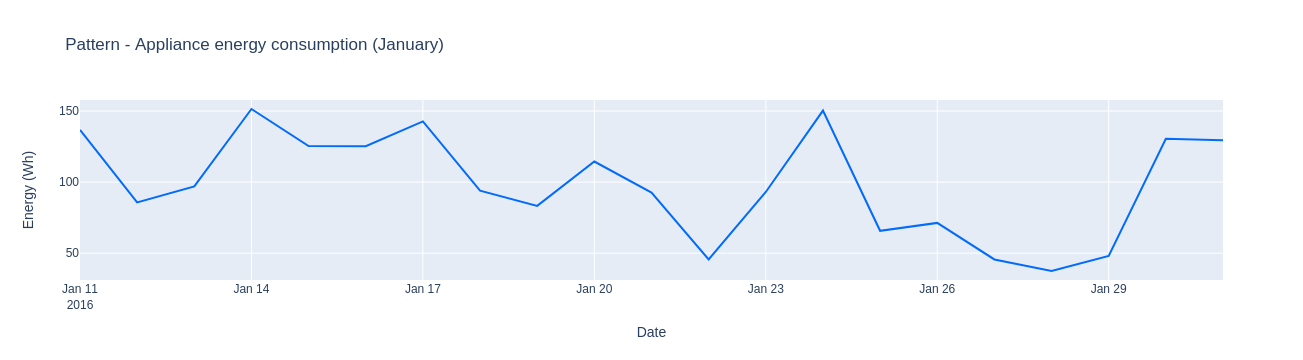

In [83]:
# To understand the timeseries variation of the applaince energy consumption
visData1_tmp = graph_objs.Scatter(
    x = tmp_data_month.date,
    y = tmp_data_month.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_monthly
)
layout = graph_objs.Layout(
    title = "Pattern - Appliance energy consumption ({:})".format(calendar.month_name[tmp_data_month["date"].dt.month[0]]),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = graph_objs.Figure(data=[visData1_tmp],layout=layout)

iplot(fig)

In [84]:
print ("********************\n{:} Statistics\n********************".format(tmp_month_name))

print ("\n) Out of \"{:}\" total records:".format(tmp_length))
for tmp_i in tmp_data_month_counts.iteritems():
    if (tmp_i[1] < 50):
        break
    print ("  - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

tmp_data_month_min = tmp_data_month.Appliances.min()
tmp_data_month_max = tmp_data_month.Appliances.max()
tmp_data_month_avg = int(tmp_data_month.Appliances.mean())

print (
    "\n) Above graph stats show that:\n",
    " - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_min),
    " - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_max),
    " - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_avg),
)
# print (tmp_data_month_counts)

********************
January Statistics
********************

) Out of "21" total records:

) Above graph stats show that:
  - "37.5 Wh" is the minimum energy consumption
  - "151.38888888888889 Wh" is the maximum energy consumption
  - "98 Wh" is the average energy consumption



In [85]:
monthwise_stats

,month,minimum,maximum,average


In [86]:
monthwise_stats.loc[len(monthwise_stats.index)] = [tmp_month_name, tmp_data_month_min, tmp_data_month_max, tmp_data_month_avg]

In [87]:
monthwise_stats

,month,minimum,maximum,average
0,January,37.5,151.388889,98


### February visualization

In [88]:
tmp_data_month = data1_02_feb.copy(deep=True)
tmp_data_month_counts = tmp_data_month.Appliances.value_counts().sort_values(ascending=False)
tmp_length = len(tmp_data_month)
tmp_month_name = calendar.month_name[tmp_data_month["date"].dt.month[0]]

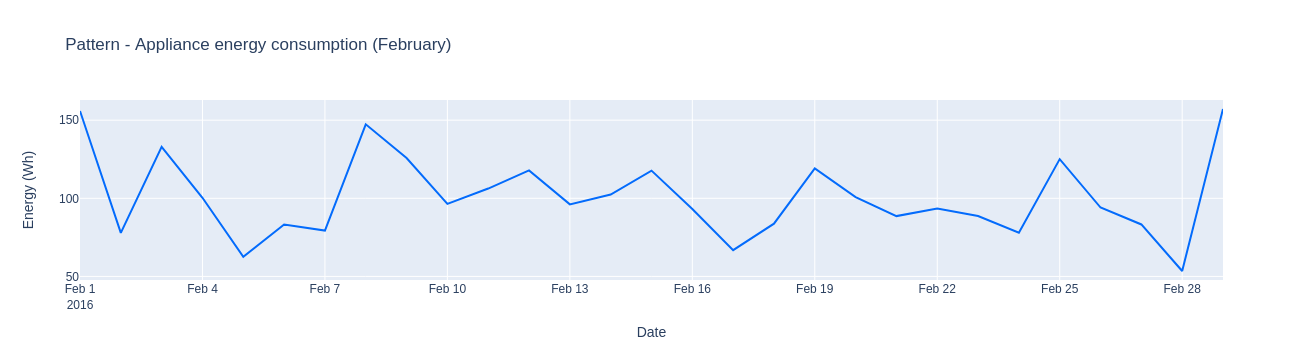

In [90]:
# To understand the timeseries variation of the applaince energy consumption
visData1_tmp = graph_objs.Scatter(
    x = tmp_data_month.date,
    y = tmp_data_month.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_monthly
)
layout = graph_objs.Layout(
    title = "Pattern - Appliance energy consumption ({:})".format(calendar.month_name[tmp_data_month["date"].dt.month[0]]),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = graph_objs.Figure(data=[visData1_tmp],layout=layout)

iplot(fig)

In [91]:
print ("********************\n{:} Statistics\n********************".format(calendar.month_name[tmp_data_month["date"].dt.month[0]]))

print ("\n) Out of \"{:}\" total records:".format(tmp_length))
for tmp_i in tmp_data_month_counts.iteritems():
    if (tmp_i[1] < 50):
        break
    print ("  - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

tmp_data_month_min = tmp_data_month.Appliances.min()
tmp_data_month_max = tmp_data_month.Appliances.max()
tmp_data_month_avg = int(tmp_data_month.Appliances.mean())

print (
    "\n) Above graph stats show that:\n",
    " - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_min),
    " - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_max),
    " - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_avg),
)
# print (tmp_data_month_counts)

********************
February Statistics
********************

) Out of "29" total records:

) Above graph stats show that:
  - "53.47222222222222 Wh" is the minimum energy consumption
  - "157.15277777777777 Wh" is the maximum energy consumption
  - "100 Wh" is the average energy consumption



In [92]:
monthwise_stats

,month,minimum,maximum,average
0,January,37.5,151.388889,98


In [93]:
monthwise_stats.loc[len(monthwise_stats.index)] = [tmp_month_name, tmp_data_month_min, tmp_data_month_max, tmp_data_month_avg]

In [94]:
monthwise_stats

,month,minimum,maximum,average
0,January,37.500000,151.388889,98
1,February,53.472222,157.152778,100


### March visualization

In [95]:
tmp_data_month = data1_03_mar.copy(deep=True)
tmp_data_month_counts = tmp_data_month.Appliances.value_counts().sort_values(ascending=False)
tmp_length = len(tmp_data_month)
tmp_month_name = calendar.month_name[tmp_data_month["date"].dt.month[0]]

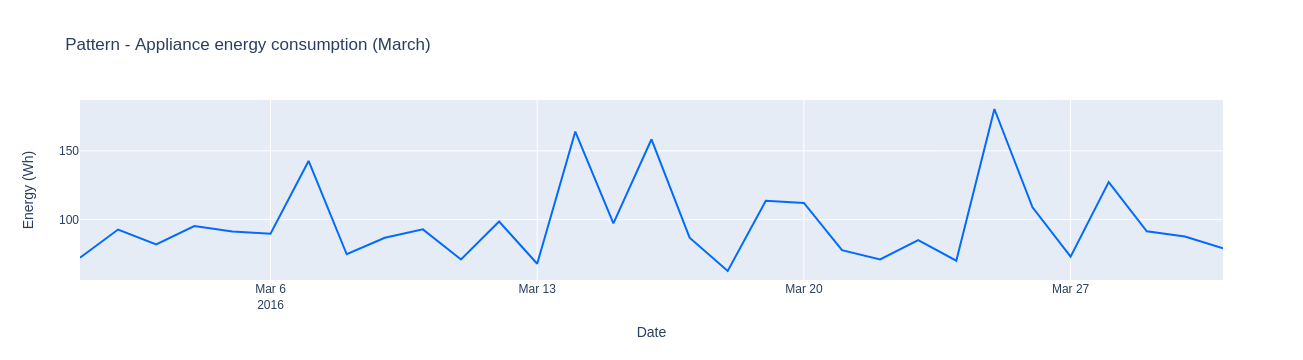

In [96]:
# To understand the timeseries variation of the applaince energy consumption
visData1_tmp = graph_objs.Scatter(
    x = tmp_data_month.date,
    y = tmp_data_month.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_monthly
)
layout = graph_objs.Layout(
    title = "Pattern - Appliance energy consumption ({:})".format(calendar.month_name[tmp_data_month["date"].dt.month[0]]),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = graph_objs.Figure(data=[visData1_tmp],layout=layout)

iplot(fig)

In [97]:
print ("********************\n{:} Statistics\n********************".format(calendar.month_name[tmp_data_month["date"].dt.month[0]]))

print ("\n) Out of \"{:}\" total records:".format(tmp_length))
for tmp_i in tmp_data_month_counts.iteritems():
    if (tmp_i[1] < 50):
        break
    print ("  - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

tmp_data_month_min = tmp_data_month.Appliances.min()
tmp_data_month_max = tmp_data_month.Appliances.max()
tmp_data_month_avg = int(tmp_data_month.Appliances.mean())

print (
    "\n) Above graph stats show that:\n",
    " - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_min),
    " - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_max),
    " - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_avg),
)
# print (tmp_data_month_counts)

********************
March Statistics
********************

) Out of "31" total records:

) Above graph stats show that:
  - "62.638888888888886 Wh" is the minimum energy consumption
  - "180.41666666666666 Wh" is the maximum energy consumption
  - "96 Wh" is the average energy consumption



In [98]:
monthwise_stats

,month,minimum,maximum,average
0,January,37.500000,151.388889,98
1,February,53.472222,157.152778,100


In [99]:
monthwise_stats.loc[len(monthwise_stats.index)] = [tmp_month_name, tmp_data_month_min, tmp_data_month_max, tmp_data_month_avg]

In [100]:
monthwise_stats

,month,minimum,maximum,average
0,January,37.500000,151.388889,98
1,February,53.472222,157.152778,100
2,March,62.638889,180.416667,96


### April visualization

In [101]:
tmp_data_month = data1_04_apr.copy(deep=True)
tmp_data_month_counts = tmp_data_month.Appliances.value_counts().sort_values(ascending=False)
tmp_length = len(tmp_data_month)
tmp_month_name = calendar.month_name[tmp_data_month["date"].dt.month[0]]

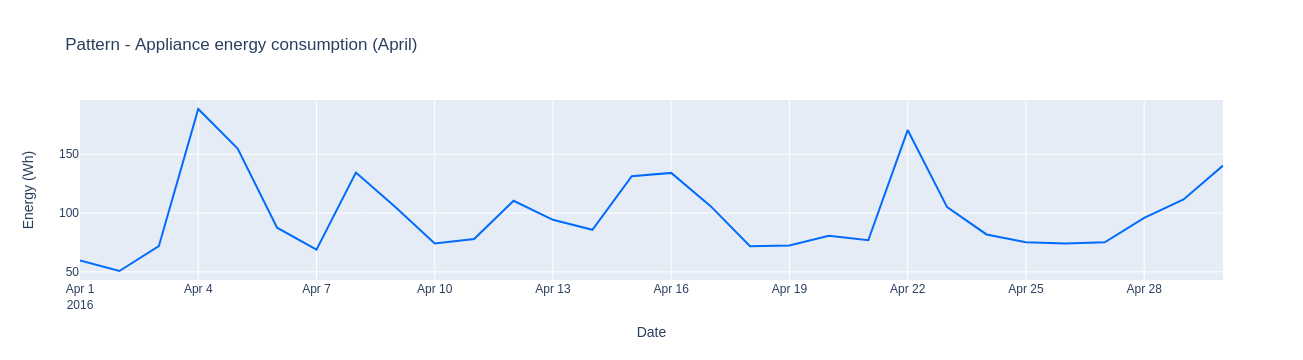

In [102]:
# To understand the timeseries variation of the applaince energy consumption
visData1_tmp = graph_objs.Scatter(
    x = tmp_data_month.date,
    y = tmp_data_month.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_monthly
)
layout = graph_objs.Layout(
    title = "Pattern - Appliance energy consumption ({:})".format(calendar.month_name[tmp_data_month["date"].dt.month[0]]),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = graph_objs.Figure(data=[visData1_tmp],layout=layout)

iplot(fig)

In [103]:
print ("********************\n{:} Statistics\n********************".format(calendar.month_name[tmp_data_month["date"].dt.month[0]]))

print ("\n) Out of \"{:}\" total records:".format(tmp_length))
for tmp_i in tmp_data_month_counts.iteritems():
    if (tmp_i[1] < 50):
        break
    print ("  - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

tmp_data_month_min = tmp_data_month.Appliances.min()
tmp_data_month_max = tmp_data_month.Appliances.max()
tmp_data_month_avg = int(tmp_data_month.Appliances.mean())

print (
    "\n) Above graph stats show that:\n",
    " - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_min),
    " - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_max),
    " - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_avg),
)
# print (tmp_data_month_counts)

********************
April Statistics
********************

) Out of "30" total records:

) Above graph stats show that:
  - "50.69444444444444 Wh" is the minimum energy consumption
  - "188.54166666666666 Wh" is the maximum energy consumption
  - "98 Wh" is the average energy consumption



In [104]:
monthwise_stats

,month,minimum,maximum,average
0,January,37.500000,151.388889,98
1,February,53.472222,157.152778,100
2,March,62.638889,180.416667,96


In [105]:
monthwise_stats.loc[len(monthwise_stats.index)] = [tmp_month_name, tmp_data_month_min, tmp_data_month_max, tmp_data_month_avg]

In [106]:
monthwise_stats

,month,minimum,maximum,average
0,January,37.500000,151.388889,98
1,February,53.472222,157.152778,100
2,March,62.638889,180.416667,96
3,April,50.694444,188.541667,98


### May visualization

In [107]:
tmp_data_month = data1_05_may.copy(deep=True)
tmp_data_month_counts = tmp_data_month.Appliances.value_counts().sort_values(ascending=False)
tmp_length = len(tmp_data_month)
tmp_month_name = calendar.month_name[tmp_data_month["date"].dt.month[0]]

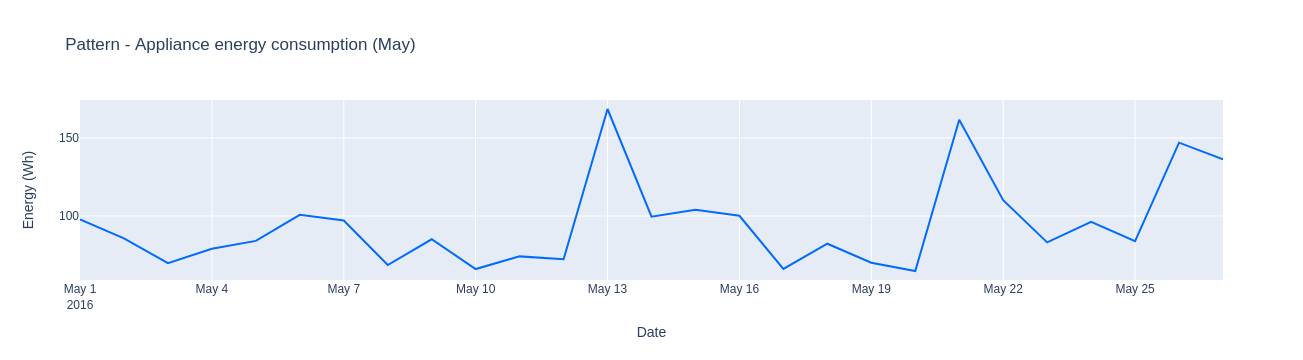

In [108]:
# To understand the timeseries variation of the applaince energy consumption
visData1_tmp = graph_objs.Scatter(
    x = tmp_data_month.date,
    y = tmp_data_month.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_monthly
)
layout = graph_objs.Layout(
    title = "Pattern - Appliance energy consumption ({:})".format(calendar.month_name[tmp_data_month["date"].dt.month[0]]),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = graph_objs.Figure(data=[visData1_tmp],layout=layout)

iplot(fig)

In [109]:
print ("********************\n{:} Statistics\n********************".format(calendar.month_name[tmp_data_month["date"].dt.month[0]]))

print ("\n) Out of \"{:}\" total records:".format(tmp_length))
for tmp_i in tmp_data_month_counts.iteritems():
    if (tmp_i[1] < 50):
        break
    print ("  - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

tmp_data_month_min = tmp_data_month.Appliances.min()
tmp_data_month_max = tmp_data_month.Appliances.max()
tmp_data_month_avg = int(tmp_data_month.Appliances.mean())

print (
    "\n) Above graph stats show that:\n",
    " - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_min),
    " - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_max),
    " - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_avg),
)
# print (tmp_data_month_counts)

********************
May Statistics
********************

) Out of "27" total records:

) Above graph stats show that:
  - "64.72222222222223 Wh" is the minimum energy consumption
  - "168.61111111111111 Wh" is the maximum energy consumption
  - "94 Wh" is the average energy consumption



In [110]:
monthwise_stats

,month,minimum,maximum,average
0,January,37.500000,151.388889,98
1,February,53.472222,157.152778,100
2,March,62.638889,180.416667,96
3,April,50.694444,188.541667,98


In [111]:
monthwise_stats.loc[len(monthwise_stats.index)] = [tmp_month_name, tmp_data_month_min, tmp_data_month_max, tmp_data_month_avg]

In [112]:
monthwise_stats

,month,minimum,maximum,average
0,January,37.500000,151.388889,98
1,February,53.472222,157.152778,100
2,March,62.638889,180.416667,96
3,April,50.694444,188.541667,98
4,May,64.722222,168.611111,94


## Setting up weekly data

In [114]:
monthwise_weekly_weekday_weekend_stats = DataFrame(
    columns=[
        "month",
        "weekday_min", "weekday_max", "weekday_avg",
        "weekend_min", "weekend_max", "weekend_avg"
    ]
)

### Januray weekly

In [116]:
tmp_data_month_weekly = data1_01_jan.copy(deep=True)
tmp_data_month_weekly["WEEKDAY"] = ((to_datetime(tmp_data_month_weekly["date"]).dt.dayofweek)// 5 == 1).astype(float)
tmp_data_month_weekly_counts = tmp_data_month_weekly["WEEKDAY"].value_counts()

tmp_data_month_weekly_energyweekday_counts = tmp_data_month_weekly[
    tmp_data_month_weekly["WEEKDAY"] == 0
].Appliances.value_counts().sort_values(ascending=False)
tmp_data_month_weekly_energyweekendday_counts = tmp_data_month_weekly[
    tmp_data_month_weekly["WEEKDAY"] != 0
].Appliances.value_counts().sort_values(ascending=False)

tmp_data_month_weekly_length = len(tmp_data_month_weekly)
tmp_data_month_weekly_name = calendar.month_name[tmp_data_month_weekly["date"].dt.month[0]]

print ("\"{:}\" Statistic\n - total records: {:}\n - week-days: {:}\n - weekend-days: {:}\n".format(
    tmp_data_month_weekly_name,
    tmp_data_month_weekly_length,
    tmp_data_month_weekly_counts[0],
    tmp_data_month_weekly_counts[1]
))

print ("\n) Weekday Statistics\n  - Out of \"{:}\" total records:".format(tmp_data_month_weekly_counts[0]))
for tmp_i in tmp_data_month_weekly_energyweekday_counts.iteritems():
    if (tmp_i[1] < 50):
        break
    print ("    - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

tmp_data_month_weekly_energyweekday_min = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.min()
tmp_data_month_weekly_energyweekday_max = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.max()
tmp_data_month_weekly_energyweekday_avg = int(tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.mean())

print (
    "  - Above graph stats show that:\n",
    "   - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_weekly_energyweekday_min),
    "   - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_weekly_energyweekday_max),
    "   - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_weekly_energyweekday_avg),
)


print ("\n) Weekend Statistics\n  - Out of \"{:}\" total records:".format(tmp_data_month_weekly_counts[1]))
for tmp_i in tmp_data_month_weekly_energyweekendday_counts.iteritems():
    if (tmp_i[1] < 50):
        break
    print ("    - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

tmp_data_month_weekly_energyweekendday_min = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.min()
tmp_data_month_weekly_energyweekendday_max = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.max()
tmp_data_month_weekly_energyweekendday_avg = int(tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.mean())

print (
    "  - Above graph stats show that:\n",
    "    - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_weekly_energyweekendday_min),
    "    - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_weekly_energyweekendday_max),
    "    - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_weekly_energyweekendday_avg),
)

"January" Statistic
 - total records: 21
 - week-days: 15
 - weekend-days: 6


) Weekday Statistics
  - Out of "15" total records:
  - Above graph stats show that:
    - "37.5 Wh" is the minimum energy consumption
    - "151.38888888888889 Wh" is the maximum energy consumption
    - "86 Wh" is the average energy consumption


) Weekend Statistics
  - Out of "6" total records:
  - Above graph stats show that:
     - "93.05555555555556 Wh" is the minimum energy consumption
     - "150.27777777777777 Wh" is the maximum energy consumption
     - "128 Wh" is the average energy consumption



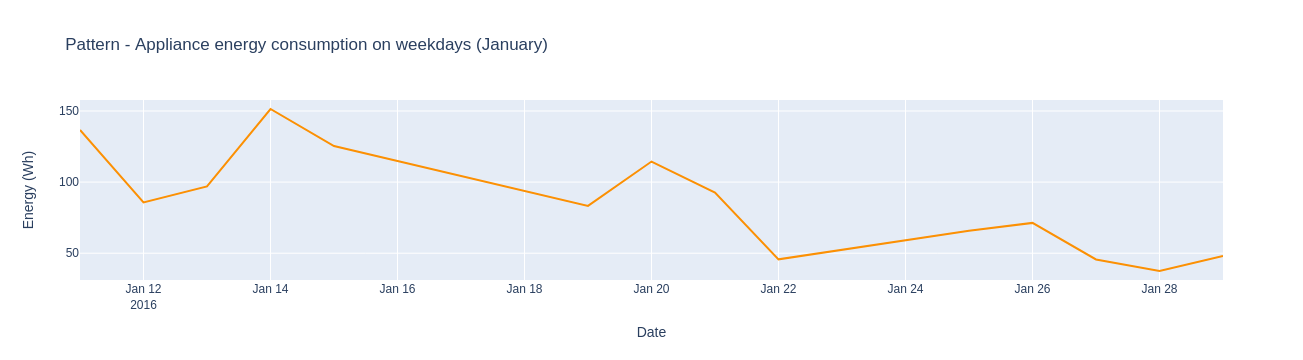

In [120]:
# Find rows with weekday 
tmp_data_month_weekly_weekdays =  tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0]
# To understand the timeseries variation of the applaince energy consumption
visData1_weekdays_tmp = graph_objs.Scatter(
    x = tmp_data_month_weekly_weekdays.date,
    y = tmp_data_month_weekly_weekdays.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_weekdays
)
layout = graph_objs.Layout(
    title = "Pattern - Appliance energy consumption on weekdays ({:})".format(tmp_data_month_weekly_name),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = graph_objs.Figure(data=[visData1_weekdays_tmp],layout=layout)

iplot(fig)

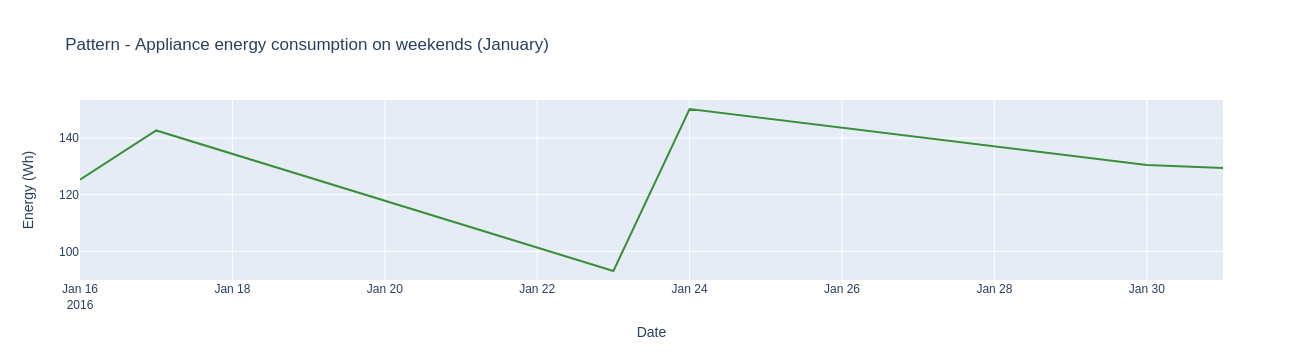

In [121]:
# Find rows with weekday 
tmp_data_month_weekly_weekenddays =  tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0]
# To understand the timeseries variation of the applaince energy consumption
visData1_weekenddays_tmp = graph_objs.Scatter(
    x = tmp_data_month_weekly_weekenddays.date,
    y = tmp_data_month_weekly_weekenddays.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_weekends
)
layout = graph_objs.Layout(
    title = "Pattern - Appliance energy consumption on weekends ({:})".format(tmp_data_month_weekly_name),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = graph_objs.Figure(data=[visData1_weekenddays_tmp],layout=layout)

iplot(fig)

In [122]:
monthwise_weekly_weekday_weekend_stats

,month,weekday_min,weekday_max,weekday_avg,weekend_min,weekend_max,weekend_avg


In [123]:
monthwise_weekly_weekday_weekend_stats.loc[len(monthwise_weekly_weekday_weekend_stats.index)] = [
    tmp_data_month_weekly_name,
    tmp_data_month_weekly_energyweekday_min, tmp_data_month_weekly_energyweekday_max,
    tmp_data_month_weekly_energyweekday_avg,
    tmp_data_month_weekly_energyweekendday_min, tmp_data_month_weekly_energyweekendday_max,
    tmp_data_month_weekly_energyweekendday_avg
]

In [124]:
monthwise_weekly_weekday_weekend_stats

,month,weekday_min,weekday_max,weekday_avg,weekend_min,weekend_max,weekend_avg
0,January,37.5,151.388889,86,93.055556,150.277778,128


### February weekly

In [127]:
tmp_data_month_weekly = data1_02_feb.copy(deep=True)
tmp_data_month_weekly["WEEKDAY"] = ((to_datetime(tmp_data_month_weekly["date"]).dt.dayofweek)// 5 == 1).astype(float)
tmp_data_month_weekly_counts = tmp_data_month_weekly["WEEKDAY"].value_counts()

tmp_data_month_weekly_energyweekday_counts = tmp_data_month_weekly[
    tmp_data_month_weekly["WEEKDAY"] == 0
].Appliances.value_counts().sort_values(ascending=False)
tmp_data_month_weekly_energyweekendday_counts = tmp_data_month_weekly[
    tmp_data_month_weekly["WEEKDAY"] != 0
].Appliances.value_counts().sort_values(ascending=False)

tmp_data_month_weekly_length = len(tmp_data_month_weekly)
tmp_data_month_weekly_name = calendar.month_name[tmp_data_month_weekly["date"].dt.month[0]]

print ("\"{:}\" Statistic\n - total records: {:}\n - week-days: {:}\n - weekend-days: {:}\n".format(
    tmp_data_month_weekly_name,
    tmp_data_month_weekly_length,
    tmp_data_month_weekly_counts[0],
    tmp_data_month_weekly_counts[1]
))

print ("\n) Weekday Statistics\n  - Out of \"{:}\" total records:".format(tmp_data_month_weekly_counts[0]))
for tmp_i in tmp_data_month_weekly_energyweekday_counts.iteritems():
    if (tmp_i[1] < 50):
        break
    print ("    - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

tmp_data_month_weekly_energyweekday_min = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.min()
tmp_data_month_weekly_energyweekday_max = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.max()
tmp_data_month_weekly_energyweekday_avg = int(tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.mean())

print (
    "  - Above graph stats show that:\n",
    "   - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_weekly_energyweekday_min),
    "   - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_weekly_energyweekday_max),
    "   - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_weekly_energyweekday_avg),
)


print ("\n) Weekend Statistics\n  - Out of \"{:}\" total records:".format(tmp_data_month_weekly_counts[1]))
for tmp_i in tmp_data_month_weekly_energyweekendday_counts.iteritems():
    if (tmp_i[1] < 50):
        break
    print ("    - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

tmp_data_month_weekly_energyweekendday_min = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.min()
tmp_data_month_weekly_energyweekendday_max = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.max()
tmp_data_month_weekly_energyweekendday_avg = int(tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.mean())

print (
    "  - Above graph stats show that:\n",
    "    - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_weekly_energyweekendday_min),
    "    - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_weekly_energyweekendday_max),
    "    - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_weekly_energyweekendday_avg),
)

"February" Statistic
 - total records: 29
 - week-days: 21
 - weekend-days: 8


) Weekday Statistics
  - Out of "21" total records:
  - Above graph stats show that:
    - "62.56944444444444 Wh" is the minimum energy consumption
    - "157.15277777777777 Wh" is the maximum energy consumption
    - "106 Wh" is the average energy consumption


) Weekend Statistics
  - Out of "8" total records:
  - Above graph stats show that:
     - "53.47222222222222 Wh" is the minimum energy consumption
     - "102.43055555555556 Wh" is the maximum energy consumption
     - "85 Wh" is the average energy consumption



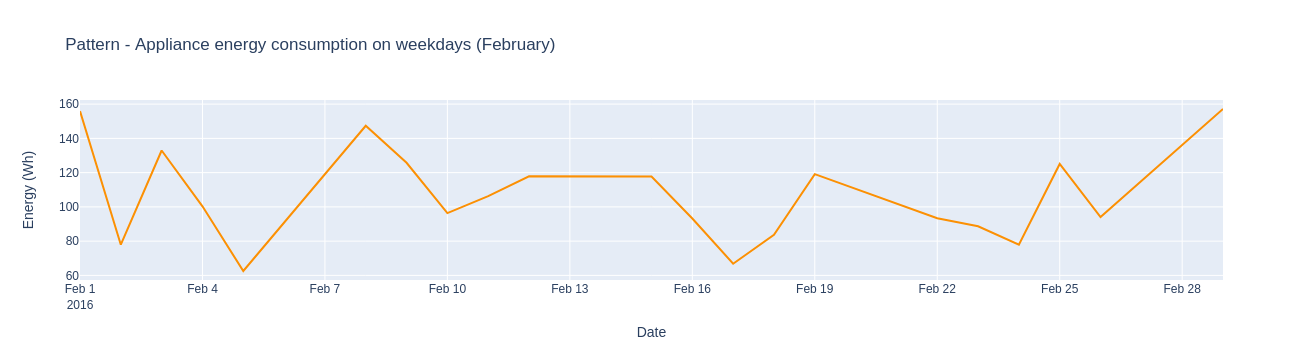

In [128]:
# Find rows with weekday 
tmp_data_month_weekly_weekdays =  tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0]
# To understand the timeseries variation of the applaince energy consumption
visData1_weekdays_tmp = graph_objs.Scatter(
    x = tmp_data_month_weekly_weekdays.date,
    y = tmp_data_month_weekly_weekdays.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_weekdays
)
layout = graph_objs.Layout(
    title = "Pattern - Appliance energy consumption on weekdays ({:})".format(tmp_data_month_weekly_name),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = graph_objs.Figure(data=[visData1_weekdays_tmp],layout=layout)

iplot(fig)

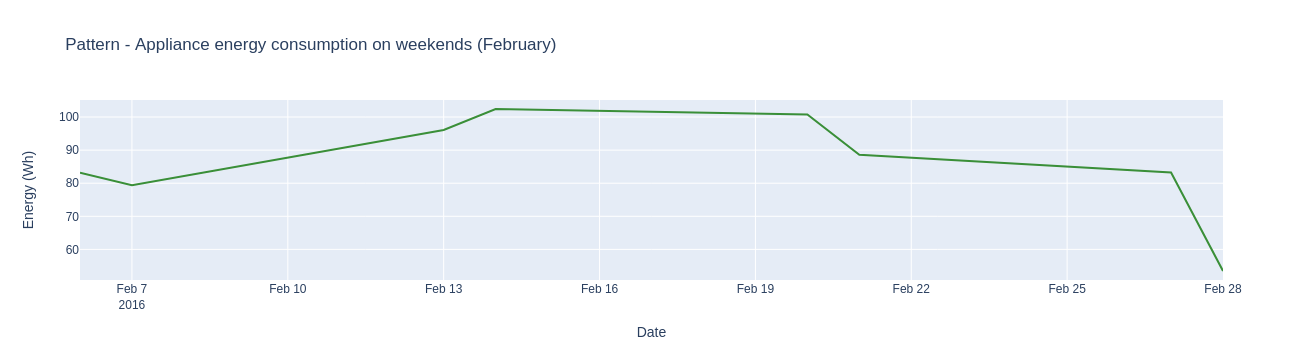

In [129]:
# Find rows with weekday 
tmp_data_month_weekly_weekenddays =  tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0]
# To understand the timeseries variation of the applaince energy consumption
visData1_weekenddays_tmp = graph_objs.Scatter(
    x = tmp_data_month_weekly_weekenddays.date,
    y = tmp_data_month_weekly_weekenddays.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_weekends
)
layout = graph_objs.Layout(
    title = "Pattern - Appliance energy consumption on weekends ({:})".format(tmp_data_month_weekly_name),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = graph_objs.Figure(data=[visData1_weekenddays_tmp],layout=layout)

iplot(fig)

In [130]:
monthwise_weekly_weekday_weekend_stats

,month,weekday_min,weekday_max,weekday_avg,weekend_min,weekend_max,weekend_avg
0,January,37.5,151.388889,86,93.055556,150.277778,128


In [131]:
monthwise_weekly_weekday_weekend_stats.loc[len(monthwise_weekly_weekday_weekend_stats.index)] = [
    tmp_data_month_weekly_name,
    tmp_data_month_weekly_energyweekday_min, tmp_data_month_weekly_energyweekday_max,
    tmp_data_month_weekly_energyweekday_avg,
    tmp_data_month_weekly_energyweekendday_min, tmp_data_month_weekly_energyweekendday_max,
    tmp_data_month_weekly_energyweekendday_avg
]

In [132]:
monthwise_weekly_weekday_weekend_stats

,month,weekday_min,weekday_max,weekday_avg,weekend_min,weekend_max,weekend_avg
0,January,37.500000,151.388889,86,93.055556,150.277778,128
1,February,62.569444,157.152778,106,53.472222,102.430556,85


### March weekly

In [133]:
tmp_data_month_weekly = data1_03_mar.copy(deep=True)
tmp_data_month_weekly["WEEKDAY"] = ((to_datetime(tmp_data_month_weekly["date"]).dt.dayofweek)// 5 == 1).astype(float)
tmp_data_month_weekly_counts = tmp_data_month_weekly["WEEKDAY"].value_counts()

tmp_data_month_weekly_energyweekday_counts = tmp_data_month_weekly[
    tmp_data_month_weekly["WEEKDAY"] == 0
].Appliances.value_counts().sort_values(ascending=False)
tmp_data_month_weekly_energyweekendday_counts = tmp_data_month_weekly[
    tmp_data_month_weekly["WEEKDAY"] != 0
].Appliances.value_counts().sort_values(ascending=False)

tmp_data_month_weekly_length = len(tmp_data_month_weekly)
tmp_data_month_weekly_name = calendar.month_name[tmp_data_month_weekly["date"].dt.month[0]]

print ("\"{:}\" Statistic\n - total records: {:}\n - week-days: {:}\n - weekend-days: {:}\n".format(
    tmp_data_month_weekly_name,
    tmp_data_month_weekly_length,
    tmp_data_month_weekly_counts[0],
    tmp_data_month_weekly_counts[1]
))

print ("\n) Weekday Statistics\n  - Out of \"{:}\" total records:".format(tmp_data_month_weekly_counts[0]))
for tmp_i in tmp_data_month_weekly_energyweekday_counts.iteritems():
    if (tmp_i[1] < 50):
        break
    print ("    - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

tmp_data_month_weekly_energyweekday_min = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.min()
tmp_data_month_weekly_energyweekday_max = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.max()
tmp_data_month_weekly_energyweekday_avg = int(tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.mean())

print (
    "  - Above graph stats show that:\n",
    "   - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_weekly_energyweekday_min),
    "   - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_weekly_energyweekday_max),
    "   - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_weekly_energyweekday_avg),
)


print ("\n) Weekend Statistics\n  - Out of \"{:}\" total records:".format(tmp_data_month_weekly_counts[1]))
for tmp_i in tmp_data_month_weekly_energyweekendday_counts.iteritems():
    if (tmp_i[1] < 50):
        break
    print ("    - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

tmp_data_month_weekly_energyweekendday_min = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.min()
tmp_data_month_weekly_energyweekendday_max = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.max()
tmp_data_month_weekly_energyweekendday_avg = int(tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.mean())

print (
    "  - Above graph stats show that:\n",
    "    - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_weekly_energyweekendday_min),
    "    - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_weekly_energyweekendday_max),
    "    - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_weekly_energyweekendday_avg),
)

"March" Statistic
 - total records: 31
 - week-days: 23
 - weekend-days: 8


) Weekday Statistics
  - Out of "23" total records:
  - Above graph stats show that:
    - "62.638888888888886 Wh" is the minimum energy consumption
    - "180.41666666666666 Wh" is the maximum energy consumption
    - "97 Wh" is the average energy consumption


) Weekend Statistics
  - Out of "8" total records:
  - Above graph stats show that:
     - "67.91666666666667 Wh" is the minimum energy consumption
     - "113.68055555555556 Wh" is the maximum energy consumption
     - "94 Wh" is the average energy consumption



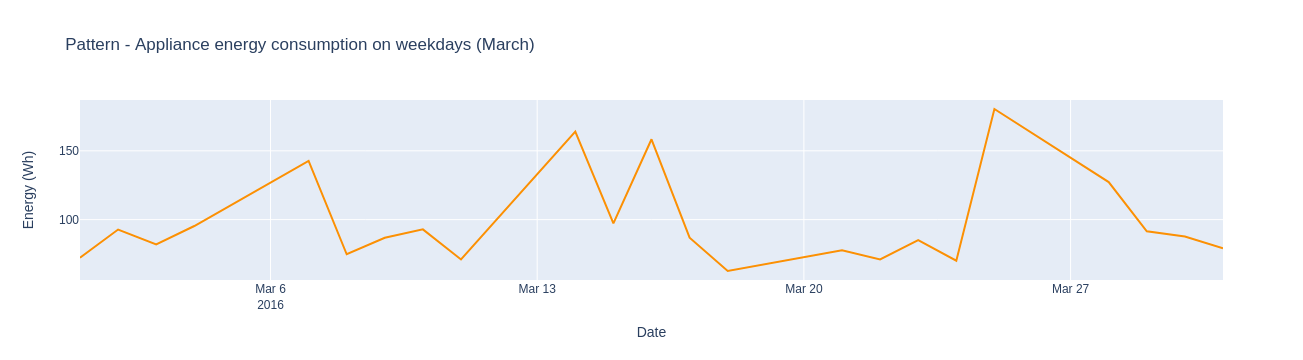

In [134]:
# Find rows with weekday 
tmp_data_month_weekly_weekdays =  tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0]
# To understand the timeseries variation of the applaince energy consumption
visData1_weekdays_tmp = graph_objs.Scatter(
    x = tmp_data_month_weekly_weekdays.date,
    y = tmp_data_month_weekly_weekdays.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_weekdays
)
layout = graph_objs.Layout(
    title = "Pattern - Appliance energy consumption on weekdays ({:})".format(tmp_data_month_weekly_name),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = graph_objs.Figure(data=[visData1_weekdays_tmp],layout=layout)

iplot(fig)

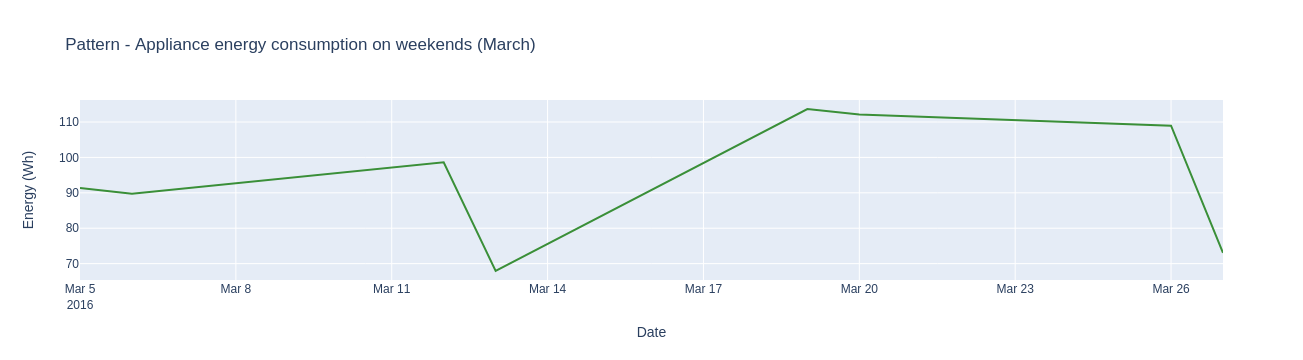

In [135]:
# Find rows with weekday 
tmp_data_month_weekly_weekenddays =  tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0]
# To understand the timeseries variation of the applaince energy consumption
visData1_weekenddays_tmp = graph_objs.Scatter(
    x = tmp_data_month_weekly_weekenddays.date,
    y = tmp_data_month_weekly_weekenddays.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_weekends
)
layout = graph_objs.Layout(
    title = "Pattern - Appliance energy consumption on weekends ({:})".format(tmp_data_month_weekly_name),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = graph_objs.Figure(data=[visData1_weekenddays_tmp],layout=layout)

iplot(fig)

In [136]:
monthwise_weekly_weekday_weekend_stats

,month,weekday_min,weekday_max,weekday_avg,weekend_min,weekend_max,weekend_avg
0,January,37.500000,151.388889,86,93.055556,150.277778,128
1,February,62.569444,157.152778,106,53.472222,102.430556,85


In [137]:
monthwise_weekly_weekday_weekend_stats.loc[len(monthwise_weekly_weekday_weekend_stats.index)] = [
    tmp_data_month_weekly_name,
    tmp_data_month_weekly_energyweekday_min, tmp_data_month_weekly_energyweekday_max,
    tmp_data_month_weekly_energyweekday_avg,
    tmp_data_month_weekly_energyweekendday_min, tmp_data_month_weekly_energyweekendday_max,
    tmp_data_month_weekly_energyweekendday_avg
]

In [138]:
monthwise_weekly_weekday_weekend_stats

,month,weekday_min,weekday_max,weekday_avg,weekend_min,weekend_max,weekend_avg
0,January,37.500000,151.388889,86,93.055556,150.277778,128
1,February,62.569444,157.152778,106,53.472222,102.430556,85
2,March,62.638889,180.416667,97,67.916667,113.680556,94


### April weekly

In [139]:
tmp_data_month_weekly = data1_04_apr.copy(deep=True)
tmp_data_month_weekly["WEEKDAY"] = ((to_datetime(tmp_data_month_weekly["date"]).dt.dayofweek)// 5 == 1).astype(float)
tmp_data_month_weekly_counts = tmp_data_month_weekly["WEEKDAY"].value_counts()

tmp_data_month_weekly_energyweekday_counts = tmp_data_month_weekly[
    tmp_data_month_weekly["WEEKDAY"] == 0
].Appliances.value_counts().sort_values(ascending=False)
tmp_data_month_weekly_energyweekendday_counts = tmp_data_month_weekly[
    tmp_data_month_weekly["WEEKDAY"] != 0
].Appliances.value_counts().sort_values(ascending=False)

tmp_data_month_weekly_length = len(tmp_data_month_weekly)
tmp_data_month_weekly_name = calendar.month_name[tmp_data_month_weekly["date"].dt.month[0]]

print ("\"{:}\" Statistic\n - total records: {:}\n - week-days: {:}\n - weekend-days: {:}\n".format(
    tmp_data_month_weekly_name,
    tmp_data_month_weekly_length,
    tmp_data_month_weekly_counts[0],
    tmp_data_month_weekly_counts[1]
))

print ("\n) Weekday Statistics\n  - Out of \"{:}\" total records:".format(tmp_data_month_weekly_counts[0]))
for tmp_i in tmp_data_month_weekly_energyweekday_counts.iteritems():
    if (tmp_i[1] < 50):
        break
    print ("    - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

tmp_data_month_weekly_energyweekday_min = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.min()
tmp_data_month_weekly_energyweekday_max = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.max()
tmp_data_month_weekly_energyweekday_avg = int(tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.mean())

print (
    "  - Above graph stats show that:\n",
    "   - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_weekly_energyweekday_min),
    "   - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_weekly_energyweekday_max),
    "   - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_weekly_energyweekday_avg),
)


print ("\n) Weekend Statistics\n  - Out of \"{:}\" total records:".format(tmp_data_month_weekly_counts[1]))
for tmp_i in tmp_data_month_weekly_energyweekendday_counts.iteritems():
    if (tmp_i[1] < 50):
        break
    print ("    - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

tmp_data_month_weekly_energyweekendday_min = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.min()
tmp_data_month_weekly_energyweekendday_max = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.max()
tmp_data_month_weekly_energyweekendday_avg = int(tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.mean())

print (
    "  - Above graph stats show that:\n",
    "    - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_weekly_energyweekendday_min),
    "    - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_weekly_energyweekendday_max),
    "    - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_weekly_energyweekendday_avg),
)

"April" Statistic
 - total records: 30
 - week-days: 21
 - weekend-days: 9


) Weekday Statistics
  - Out of "21" total records:
  - Above graph stats show that:
    - "59.583333333333336 Wh" is the minimum energy consumption
    - "188.54166666666666 Wh" is the maximum energy consumption
    - "99 Wh" is the average energy consumption


) Weekend Statistics
  - Out of "9" total records:
  - Above graph stats show that:
     - "50.69444444444444 Wh" is the minimum energy consumption
     - "140.41666666666666 Wh" is the maximum energy consumption
     - "96 Wh" is the average energy consumption



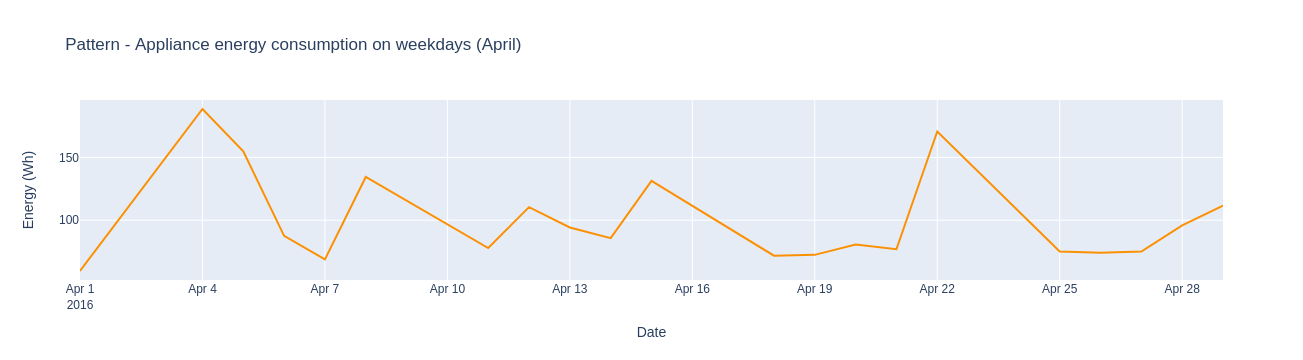

In [141]:
# Find rows with weekday 
tmp_data_month_weekly_weekdays =  tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0]
# To understand the timeseries variation of the applaince energy consumption
visData1_weekdays_tmp = graph_objs.Scatter(
    x = tmp_data_month_weekly_weekdays.date,
    y = tmp_data_month_weekly_weekdays.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_weekdays
)
layout = graph_objs.Layout(
    title = "Pattern - Appliance energy consumption on weekdays ({:})".format(tmp_data_month_weekly_name),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = graph_objs.Figure(data=[visData1_weekdays_tmp],layout=layout)

iplot(fig)

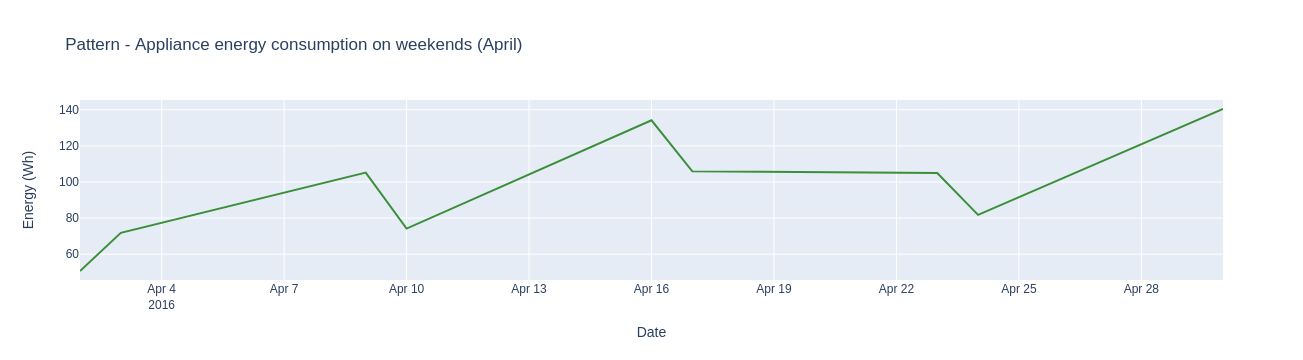

In [142]:
# Find rows with weekday 
tmp_data_month_weekly_weekenddays =  tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0]
# To understand the timeseries variation of the applaince energy consumption
visData1_weekenddays_tmp = graph_objs.Scatter(
    x = tmp_data_month_weekly_weekenddays.date,
    y = tmp_data_month_weekly_weekenddays.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_weekends
)
layout = graph_objs.Layout(
    title = "Pattern - Appliance energy consumption on weekends ({:})".format(tmp_data_month_weekly_name),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = graph_objs.Figure(data=[visData1_weekenddays_tmp],layout=layout)

iplot(fig)

In [143]:
monthwise_weekly_weekday_weekend_stats

,month,weekday_min,weekday_max,weekday_avg,weekend_min,weekend_max,weekend_avg
0,January,37.500000,151.388889,86,93.055556,150.277778,128
1,February,62.569444,157.152778,106,53.472222,102.430556,85
2,March,62.638889,180.416667,97,67.916667,113.680556,94


In [144]:
monthwise_weekly_weekday_weekend_stats.loc[len(monthwise_weekly_weekday_weekend_stats.index)] = [
    tmp_data_month_weekly_name,
    tmp_data_month_weekly_energyweekday_min, tmp_data_month_weekly_energyweekday_max,
    tmp_data_month_weekly_energyweekday_avg,
    tmp_data_month_weekly_energyweekendday_min, tmp_data_month_weekly_energyweekendday_max,
    tmp_data_month_weekly_energyweekendday_avg
]

In [145]:
monthwise_weekly_weekday_weekend_stats

,month,weekday_min,weekday_max,weekday_avg,weekend_min,weekend_max,weekend_avg
0,January,37.500000,151.388889,86,93.055556,150.277778,128
1,February,62.569444,157.152778,106,53.472222,102.430556,85
2,March,62.638889,180.416667,97,67.916667,113.680556,94
3,April,59.583333,188.541667,99,50.694444,140.416667,96


### May weekly

In [146]:
tmp_data_month_weekly = data1_05_may.copy(deep=True)
tmp_data_month_weekly["WEEKDAY"] = ((to_datetime(tmp_data_month_weekly["date"]).dt.dayofweek)// 5 == 1).astype(float)
tmp_data_month_weekly_counts = tmp_data_month_weekly["WEEKDAY"].value_counts()

tmp_data_month_weekly_energyweekday_counts = tmp_data_month_weekly[
    tmp_data_month_weekly["WEEKDAY"] == 0
].Appliances.value_counts().sort_values(ascending=False)
tmp_data_month_weekly_energyweekendday_counts = tmp_data_month_weekly[
    tmp_data_month_weekly["WEEKDAY"] != 0
].Appliances.value_counts().sort_values(ascending=False)

tmp_data_month_weekly_length = len(tmp_data_month_weekly)
tmp_data_month_weekly_name = calendar.month_name[tmp_data_month_weekly["date"].dt.month[0]]

print ("\"{:}\" Statistic\n - total records: {:}\n - week-days: {:}\n - weekend-days: {:}\n".format(
    tmp_data_month_weekly_name,
    tmp_data_month_weekly_length,
    tmp_data_month_weekly_counts[0],
    tmp_data_month_weekly_counts[1]
))

print ("\n) Weekday Statistics\n  - Out of \"{:}\" total records:".format(tmp_data_month_weekly_counts[0]))
for tmp_i in tmp_data_month_weekly_energyweekday_counts.iteritems():
    if (tmp_i[1] < 50):
        break
    print ("    - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

tmp_data_month_weekly_energyweekday_min = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.min()
tmp_data_month_weekly_energyweekday_max = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.max()
tmp_data_month_weekly_energyweekday_avg = int(tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.mean())

print (
    "  - Above graph stats show that:\n",
    "   - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_weekly_energyweekday_min),
    "   - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_weekly_energyweekday_max),
    "   - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_weekly_energyweekday_avg),
)


print ("\n) Weekend Statistics\n  - Out of \"{:}\" total records:".format(tmp_data_month_weekly_counts[1]))
for tmp_i in tmp_data_month_weekly_energyweekendday_counts.iteritems():
    if (tmp_i[1] < 50):
        break
    print ("    - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

tmp_data_month_weekly_energyweekendday_min = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.min()
tmp_data_month_weekly_energyweekendday_max = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.max()
tmp_data_month_weekly_energyweekendday_avg = int(tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.mean())

print (
    "  - Above graph stats show that:\n",
    "    - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_weekly_energyweekendday_min),
    "    - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_weekly_energyweekendday_max),
    "    - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_weekly_energyweekendday_avg),
)

"May" Statistic
 - total records: 27
 - week-days: 20
 - weekend-days: 7


) Weekday Statistics
  - Out of "20" total records:
  - Above graph stats show that:
    - "64.72222222222223 Wh" is the minimum energy consumption
    - "168.61111111111111 Wh" is the maximum energy consumption
    - "90 Wh" is the average energy consumption


) Weekend Statistics
  - Out of "7" total records:
  - Above graph stats show that:
     - "68.54166666666667 Wh" is the minimum energy consumption
     - "161.66666666666666 Wh" is the maximum energy consumption
     - "105 Wh" is the average energy consumption



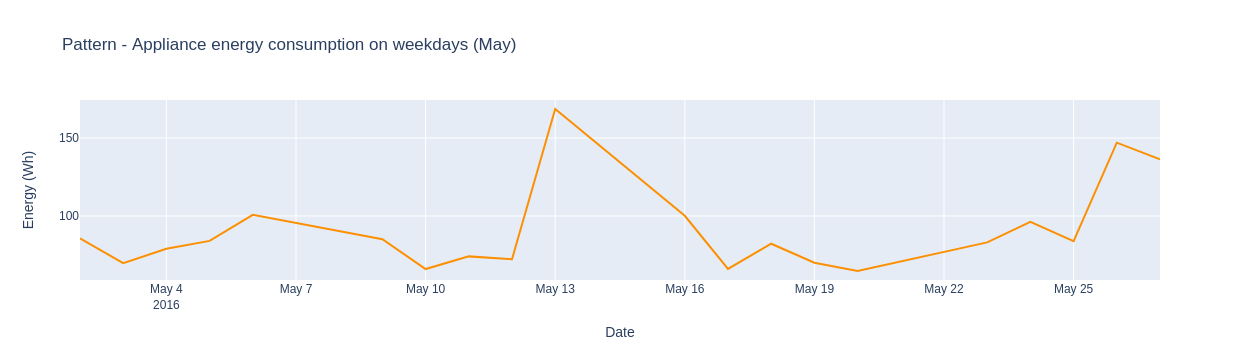

In [147]:
# Find rows with weekday 
tmp_data_month_weekly_weekdays =  tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0]
# To understand the timeseries variation of the applaince energy consumption
visData1_weekdays_tmp = graph_objs.Scatter(
    x = tmp_data_month_weekly_weekdays.date,
    y = tmp_data_month_weekly_weekdays.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_weekdays
)
layout = graph_objs.Layout(
    title = "Pattern - Appliance energy consumption on weekdays ({:})".format(tmp_data_month_weekly_name),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = graph_objs.Figure(data=[visData1_weekdays_tmp],layout=layout)

iplot(fig)

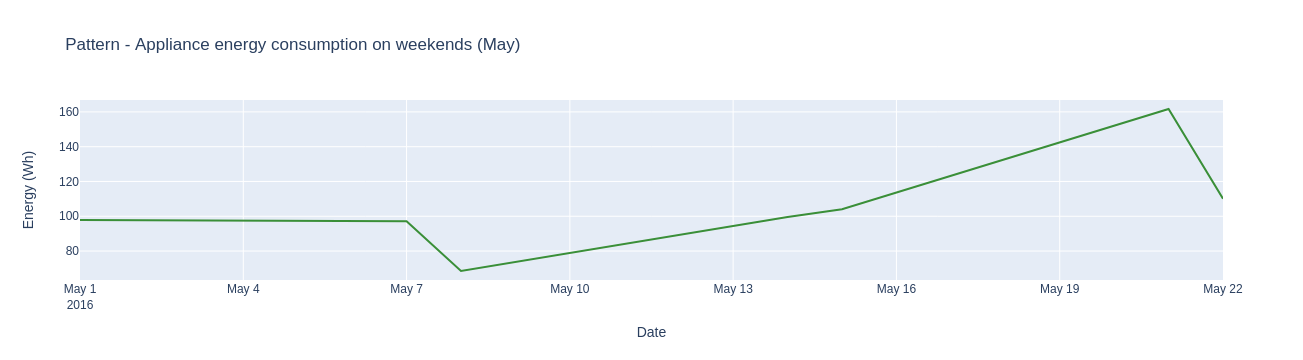

In [148]:
# Find rows with weekday 
tmp_data_month_weekly_weekenddays =  tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0]
# To understand the timeseries variation of the applaince energy consumption
visData1_weekenddays_tmp = graph_objs.Scatter(
    x = tmp_data_month_weekly_weekenddays.date,
    y = tmp_data_month_weekly_weekenddays.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_weekends
)
layout = graph_objs.Layout(
    title = "Pattern - Appliance energy consumption on weekends ({:})".format(tmp_data_month_weekly_name),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = graph_objs.Figure(data=[visData1_weekenddays_tmp],layout=layout)

iplot(fig)

In [149]:
monthwise_weekly_weekday_weekend_stats

,month,weekday_min,weekday_max,weekday_avg,weekend_min,weekend_max,weekend_avg
0,January,37.500000,151.388889,86,93.055556,150.277778,128
1,February,62.569444,157.152778,106,53.472222,102.430556,85
2,March,62.638889,180.416667,97,67.916667,113.680556,94
3,April,59.583333,188.541667,99,50.694444,140.416667,96


In [150]:
monthwise_weekly_weekday_weekend_stats.loc[len(monthwise_weekly_weekday_weekend_stats.index)] = [
    tmp_data_month_weekly_name,
    tmp_data_month_weekly_energyweekday_min, tmp_data_month_weekly_energyweekday_max,
    tmp_data_month_weekly_energyweekday_avg,
    tmp_data_month_weekly_energyweekendday_min, tmp_data_month_weekly_energyweekendday_max,
    tmp_data_month_weekly_energyweekendday_avg
]

In [151]:
monthwise_weekly_weekday_weekend_stats

,month,weekday_min,weekday_max,weekday_avg,weekend_min,weekend_max,weekend_avg
0,January,37.500000,151.388889,86,93.055556,150.277778,128
1,February,62.569444,157.152778,106,53.472222,102.430556,85
2,March,62.638889,180.416667,97,67.916667,113.680556,94
3,April,59.583333,188.541667,99,50.694444,140.416667,96
4,May,64.722222,168.611111,90,68.541667,161.666667,105


## Setting up daily data

In [ ]:
tmp_data_month_daily = data1.copy(deep=True)

In [ ]:
tmp_data_month_daily

In [ ]:
# To understand the timeseries variation of the applaince energy consumption
visData1_daily_tmp = go.Scatter(
    x = tmp_data_month_daily.index,
    y = tmp_data_month_daily.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_weekdays
)
layout = go.Layout(
    title = "Pattern - Appliance energy consumption daily".format(tmp_data_month_weekly_name),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = go.Figure(data=[visData1_daily_tmp],layout=layout)

iplot(fig)

## Setting up week-by-week data

In [ ]:
monthwise_weekbyweek_weekday_stats = pd.DataFrame(
    columns=[
        "month", "week",
        "wk1_min", "wk1_max", "wk1_avg",
        "wk2_min", "wk2_max", "wk2_avg",
        "wk3_min", "wk3_max", "wk3_avg",
        "wk4_min", "wk4_max", "wk4_avg",
        "wk5_min", "wk5_max", "wk5_avg"
    ]
)

monthwise_weekbyweek_weekend_stats = pd.DataFrame(
    columns=[
        "month", "week",
        "wk1_min", "wk1_max", "wk1_avg",
        "wk2_min", "wk2_max", "wk2_avg",
        "wk3_min", "wk3_max", "wk3_avg",
        "wk4_min", "wk4_max", "wk4_avg",
        "wk5_min", "wk5_max", "wk5_avg"
    ]
)

In [ ]:
monthwise_weekbyweek_weekday_stats

In [ ]:
monthwise_weekbyweek_weekend_stats

### Januray week by week data

### February week by week data

In [ ]:
# tmp_data_month_weekly = data1_02_feb.copy(deep=True)
# tmp_data_month_weekly["WEEKDAY"] = ((pd.to_datetime(tmp_data_month_weekly["date"]).dt.dayofweek)// 5 == 1).astype(float)
# tmp_data_month_weekly_counts = tmp_data_month_weekly["WEEKDAY"].value_counts()

# tmp_data_month_weekly_energyweekday_counts = tmp_data_month_weekly[
#     tmp_data_month_weekly["WEEKDAY"] == 0
# ].Appliances.value_counts().sort_values(ascending=False)
# tmp_data_month_weekly_energyweekendday_counts = tmp_data_month_weekly[
#     tmp_data_month_weekly["WEEKDAY"] != 0
# ].Appliances.value_counts().sort_values(ascending=False)

# tmp_data_month_weekly_length = len(tmp_data_month_weekly)
# tmp_data_month_weekly_name = calendar.month_name[tmp_data_month_weekly["date"].dt.month[0]]

# print ("\"{:}\" Statistic\n - total records: {:}\n - week-days: {:}\n - weekend-days: {:}\n".format(
#     tmp_data_month_weekly_name,
#     tmp_data_month_weekly_length,
#     tmp_data_month_weekly_counts[0],
#     tmp_data_month_weekly_counts[1]
# ))

# print ("\n) Weekday Statistics\n  - Out of \"{:}\" total records:".format(tmp_data_month_weekly_counts[0]))
# for tmp_i in tmp_data_month_weekly_energyweekday_counts.iteritems():
#     if (tmp_i[1] < 50):
#         break
#     print ("    - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

# tmp_data_month_weekly_energyweekday_min = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.min()
# tmp_data_month_weekly_energyweekday_max = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.max()
# tmp_data_month_weekly_energyweekday_avg = int(tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.mean())

# print (
#     "  - Above graph stats show that:\n",
#     "   - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_weekly_energyweekday_min),
#     "   - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_weekly_energyweekday_max),
#     "   - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_weekly_energyweekday_avg),
# )


# print ("\n) Weekend Statistics\n  - Out of \"{:}\" total records:".format(tmp_data_month_weekly_counts[1]))
# for tmp_i in tmp_data_month_weekly_energyweekendday_counts.iteritems():
#     if (tmp_i[1] < 50):
#         break
#     print ("    - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

# tmp_data_month_weekly_energyweekendday_min = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.min()
# tmp_data_month_weekly_energyweekendday_max = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.max()
# tmp_data_month_weekly_energyweekendday_avg = int(tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.mean())

# print (
#     "  - Above graph stats show that:\n",
#     "    - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_weekly_energyweekendday_min),
#     "    - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_weekly_energyweekendday_max),
#     "    - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_weekly_energyweekendday_avg),
# )

In [ ]:
# # Find rows with weekday 
# tmp_data_month_weekly_weekdays =  tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0]
# # To understand the timeseries variation of the applaince energy consumption
# visData1_weekdays_tmp = go.Scatter(
#     x = tmp_data_month_weekly_weekdays.date,
#     y = tmp_data_month_weekly_weekdays.Appliances,
#     mode = "lines",
#     line_color=asif_graph_color_theme_weekdays
# )
# layout = go.Layout(
#     title = "Pattern - Appliance energy consumption on weekdays ({:})".format(tmp_data_month_weekly_name),
#     xaxis=dict(title='Date'),
#     yaxis=dict(title='Energy (Wh)')
# )
# fig = go.Figure(data=[visData1_weekdays_tmp],layout=layout)

# iplot(fig)

In [ ]:
# # Find rows with weekday 
# tmp_data_month_weekly_weekenddays =  tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0]
# # To understand the timeseries variation of the applaince energy consumption
# visData1_weekenddays_tmp = go.Scatter(
#     x = tmp_data_month_weekly_weekenddays.date,
#     y = tmp_data_month_weekly_weekenddays.Appliances,
#     mode = "lines",
#     line_color=asif_graph_color_theme_weekends
# )
# layout = go.Layout(
#     title = "Pattern - Appliance energy consumption on weekends ({:})".format(tmp_data_month_weekly_name),
#     xaxis=dict(title='Date'),
#     yaxis=dict(title='Energy (Wh)')
# )
# fig = go.Figure(data=[visData1_weekenddays_tmp],layout=layout)

# iplot(fig)

In [ ]:
# monthwise_weekbyweek_weekday_stats

In [ ]:
# monthwise_weekbyweek_weekday_stats.loc[len(monthwise_weekbyweek_weekday_stats.index)] = [
#     tmp_data_month_weekly_name,
#     tmp_data_month_weekly_energyweekday_min, tmp_data_month_weekly_energyweekday_max,
#     tmp_data_month_weekly_energyweekday_avg,
#     tmp_data_month_weekly_energyweekendday_min, tmp_data_month_weekly_energyweekendday_max,
#     tmp_data_month_weekly_energyweekendday_avg
# ]

In [ ]:
# monthwise_weekbyweek_weekday_stats

In [ ]:
# monthwise_weekbyweek_weekend_stats

In [ ]:
# monthwise_weekbyweek_weekend_stats.loc[len(monthwise_weekbyweek_weekend_stats.index)] = [
#     tmp_data_month_weekly_name,
#     tmp_data_month_weekly_energyweekendday_min, tmp_data_month_weekly_energyweekday_max,
#     tmp_data_month_weekly_energyweekendday_avg,
# ]

# X2. Scaling up the data to set up the train/test dataset

## converting/getting dataframe values into an 'numpy array'

In [ ]:
values=data_original.values

## - scaling the dataset

### - a) scaled by 'StandardScalar' Approach (run below IFF you've not used Approach (A) above to scale the data.

In [ ]:
# normalize features
scaler = StandardScaler()
scaled = scaler.fit_transform(values)

In [ ]:
scaled

In [ ]:
scaled.shape

In [ ]:
type(scaled)

### - b) scaled by 'MinMaxScaler' Approach (run below IFF you've not used Approach (A) above to scale the data.

In [ ]:
# # normalize features
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled = scaler.fit_transform(values)

In [ ]:
# scaled

In [ ]:
# scaled.shape

In [ ]:
# type(scaled)

## getting the scaled values back into a 'dataframe' against the time 't-1' and 't'

In [ ]:
# reframed = series_to_supervised(scaled, 1, 1)

In [ ]:
# reframed

## dropping 22 columns that were duplicated 'reframed' dataframe returned contains 44 columns, so we need to remove the remaining 22 extra columns

In [ ]:
reframed.drop(reframed.columns[[22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43]], axis=1, inplace=True)

In [ ]:
reframed

## overwriting scaled data to 'values' variable (previously it contained real values, now it has values in the range of 0-1)

In [ ]:
values = reframed.values

In [ ]:
values[0]

In [ ]:
print(
    "Shape of 'values': {:}\n\t- Rows in 'values': {:}\n\t- Columns in 'values': {:}".format(
        values.shape, values.shape[1], values.shape[0]
    )
)

## the array 'X' contains all inputs whereas 'Y' contains all outputs

In [ ]:
# before X and Y
# X = values[:,:21]
# Y = values[:,21]

# mine X and Y
X = values[:,1:22]
Y = values[:,0]

In [ ]:
values[:,:21][0]

In [ ]:
values[:,1:22][0]

In [ ]:
X.shape

In [ ]:
Y.shape

In [ ]:
input_row_number = 0
print ("training data[{:}]:\n  {:}".format(input_row_number, values[input_row_number]))
print ("\ntraining input[{:}]:\n  {:}".format(input_row_number, X[input_row_number]))
print ("\ntraining output[{:}]: {:}".format(input_row_number, Y[input_row_number]))

## Splitting up training/test data

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3)

# reshape input to be 3D [samples, timesteps, features]
X_Train = X_Train.reshape((X_Train.shape[0], 1, X_Train.shape[1]))
X_Test = X_Test.reshape((X_Test.shape[0], 1, X_Test.shape[1]))

In [ ]:
X_Train.shape

In [ ]:
X_Train.shape[2]

In [ ]:
Y_Train.shape

In [ ]:
X_Test.shape

In [ ]:
Y_Test.shape

# X3. Configuring LSTM with Many Optimizers/Layers

## Training LSTM with RMSProp

In [ ]:
model_loss_function = "mae"

In [ ]:
opt_rmsprop = RMSprop(
    learning_rate = 0.001,
    rho = 0.9,
    momentum = 0.0,
    epsilon = 1e-07,
    centered = False,
    name = "RMSprop",
)

In [ ]:
model = Sequential()
model.add(LSTM(
    50, #units
    input_shape = ( # (1, 21)
        X_Train.shape[1], # 1 row
        X_Train.shape[2] # 21 columns
    )
))
model.add(Dense(70)) # New hidden layer with 70 params
model.add(Dense(70)) # New hidden layer with 70 params
model.add(Dense(1))
# New loss function (mse to mae)
# New optimizer (adam to RMSprop)
model.compile(loss = model_loss_function, optimizer = opt_rmsprop)

# fit
history = model.fit(
    X_Train,
    Y_Train,
    epochs = 17, # New epochs (70 to 17)
    batch_size = 64, # New batch_size (10 to 64)
    validation_data = (X_Test, Y_Test),
    verbose = 2,
    shuffle = False
)

In [ ]:
model.summary()

In [ ]:
dot_img_file = "models/model_lstm_standardscalar.png"
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

## Training LSTM with SGD

In [ ]:
# opt_sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [ ]:
# model = Sequential()
# model.add(LSTM(
#     50, #units
#     input_shape=(# (1, 21)
#         X_Train.shape[1],# 1 row
#         X_Train.shape[2]# 21 columns
#     )
# ))
# model.add(Dense(70)) # New hidden layer with 70 params
# model.add(Dense(70)) # New hidden layer with 70 params
# model.add(Dense(1))
# # New loss function (mse to mae)
# # New optimizer (adam to RMSprop)
# model.compile(loss='mae', optimizer=opt_rmsprop)

# # fit
# history = model.fit(
#     X_Train,
#     Y_Train,
#     epochs=17, # New epochs (70 to 17)
#     batch_size=64, # New batch_size (10 to 64)
#     validation_data=(X_Test, Y_Test),
#     verbose=2,
#     shuffle=False
# )

## Training LSTM with Adam

In [ ]:
# model = Sequential()
# model.add(LSTM(
#     50, #units
#     input_shape=(# (1, 21)
#         X_Train.shape[1],# 1 row
#         X_Train.shape[2]# 21 columns
#     )
# ))
# model.add(Dense(1))
# model.compile(loss='mse', optimizer='adam')

# # fit
# history = model.fit(
#     X_Train,
#     Y_Train,
#     epochs=70,
#     batch_size=10,
#     validation_data=(X_Test, Y_Test),
#     verbose=2,
#     shuffle=False
# )

In [ ]:
# model.summary()

## Training LSTM with Many Layers

In [ ]:
# input = tf.keras.Input(shape=(100,), dtype="int32", name="input")
# x = tf.keras.layers.Embedding(
#     output_dim=512,
#     input_dim=10000,
#     input_length=100
# )(input)

# x = tf.keras.layers.LSTM(32)(x)

# x = tf.keras.layers.Dense(64, activation="relu")(x)
# x = tf.keras.layers.Dense(64, activation="relu")(x)
# x = tf.keras.layers.Dense(64, activation="relu")(x)

# output = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(x)

# model = tf.keras.Model(
#     inputs=[input],
#     outputs=[output]
# )

# dot_img_file = "models/xest_model.png"
# tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

# X4. Evaluating

## Plotting training history to show training progress

In [ ]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.show()

## Plotting LSTM forecast, in comparison to the actual

In [ ]:
lstm_y_pred_test = model.predict(X_Test)
plt.figure(figsize=(20, 6))
plt.plot(Y_Test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Appliances scaled')
plt.legend()
plt.show();

## Converting 'scaled' array into a dataframe (we did not use it but just printed for visualizing the data)

In [ ]:
scaled.shape

In [ ]:
sca=DataFrame(scaled)
sca.head()

In [ ]:
sca.shape

## Error Evaluation

### - MAE / MSE / RMSE

In [ ]:
lstm_test = model.evaluate(X_Test, Y_Test, batch_size=1)

In [ ]:
model_loss_function = model.loss.upper()
print ("\n - ", end="")

if (model_loss_function == "MAE"):
    print ("Mean Absolute Error (MAE):", end =" ")
elif (model_loss_function == "MSE"):
    print ("Mean Squared Error (MSE):", end =" ")
else:
    print ("Loss Function (LF):", end =" ")
print (lstm_test, "\n")

### - R2 Score

In [ ]:
y_pred_test_lstm = model.predict(X_Test)
y_train_pred_lstm = model.predict(X_Train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(Y_Train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_Test, y_pred_test_lstm)))

### - RMSE

In [ ]:
# # before X and Y
# # X = values[:,:21]
# # Y = values[:,21]

# # mine X and Y
# X = values[:,1:22]
# Y = values[:,0]

In [ ]:
# # make a prediction
# yhat = model.predict(X_Test)
# X_Test = X_Test.reshape((X_Test.shape[0], 21))

# # invert scaling for forecast
# inv_yhat = np.concatenate((yhat, X_Test[:, -21:]), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:,0]

# # invert scaling for actual
# Y_Test = Y_Test.reshape((len(Y_Test), 1))
# inv_y = np.concatenate((Y_Test, X_Test[:, -21:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]

# # calculate RMSE
# rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
# print('Test RMSE: %.3f' % rmse)

### - MAPE

In [ ]:
# tmp_mape = tf.keras.losses.MeanAbsolutePercentageError(
#     reduction=tf.keras.losses.Reduction.SUM
# )
# tmp_mape(inv_y, inv_yhat).numpy()